# 4. Equity Modeling #
&copy; 2020 Kenneth Winston

While the pricing formula \eqref{eq:generic_pricing} is generic enough to cover just about any financial arrangement, it is most useful for fixed income instruments where the planned cash flows are highly likely. As the times and amounts in \eqref{eq:generic_pricing} become less and less certain, the value of enumerating possible but not probable cash flows gets lower and lower.

<a name="bachelier"></a>Thus equity modelers have taken other approaches. In his 1900 PhD thesis at the Sorbonne, [Louis Bachelier](https://books.google.com/books?id=XcZwuHGRxsgC&pg) originated an approach to equity that provides the basis for most current models. His approach was essentially formula \eqref{eq:sde_percentage_changes}; the key insight was the use of Brownian motion ($d\beta$ in \eqref{eq:sde_percentage_changes}) 5 years before Einstein's paper on the subject. For good measure Bachelier covered options pricing, anticipating by over 70 years what is perhaps the most famous result in mathematical finance: the [Black-Scholes option formula](https://doi.org/10.1086%2F260062)

Bachelier's work was largely forgotten until it was rediscovered and promoted by the statistician [Leonard Jimmie Savage](https://www.jstor.org/stable/2240741) in the 1950's. Whether they knew it or not, many economists and financial modelers starting in the 1950's and 1960's were using Bachelier's ideas.

In this chapter we'll discuss some of the most common equity models, starting with Harry Markowitz's efficient frontier. We'll then briefly review Bayes' Rule, and see how Bayesian adjustments are often used in practical methods to select portfolios with simultaneous risk and reward optimization.

Finally we'll show a practical and widely used Bayesian method for equity return estimation, the Black-Litterman algorithm.

## 4.1 Markowitz Efficient Frontier
<a name="markowitz_efficient_frontier"></a>

Harry Markowitz is considered the father of quantitative finance. In a [1952 Journal of Finance article](https://doi.org/10.2307/2975974), he considered the problem of how investors should assemble sets of assets (**`portfolios`**) from individual assets. He expanded on these ideas in his 1954 PhD thesis at the University of Chicago and in a [1959 book](https://www.jstor.org/stable/j.ctt1bh4c8h).

Prior to Markowitz, investment managers who constructed portfolios had a concept that risk was something you needed to be compensated for bearing. This was compatible with Frank Knight's formulation of risk as lack of information about the future: you needed to be paid to expose your portfolio to an unknown future. However, there was no metric for risk and therefore no precise link between how much risk you took and how much you needed to be compensated for it.

The idea that you could put a number on financial risk &mdash; that you could measure your lack of information about the future of an investment &mdash; is essentially due to Markowitz, who won the [1990 Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel](https://www.nobelprize.org/prizes/economic-sciences/1990/press-release/) for his work. Markowitz is currently an adjunct professor at the [University of California at San Diego](https://rady.ucsd.edu/people/faculty/markowitz/).

One way of thinking of a portfolio is as an n-vector $w$ (where n is the number of all the assets in the world) that satisfies the **`budget constraint`** $w^{\prime}u=1$ (u the unit n-vector of all ones). $w$ is the vector of weights of assets you own at a certain time, scaled so it represents 100% of your wealth. $w$ can contain negative values.

The **`return`** or **`rate of return`** on an asset during a time period is the ending value of the asset divided by the beginning value of the asset, minus one. If there are distributions such as dividends or coupons during the period, they are added (possibly in a time-adjusted way) to the ending value. The returns on the $n$ assets in the world during a period can be characterized by a random variable n-vector $r$. Thus the scalar random variable giving the return of a portfolio $w$ during the period is $w^{\prime}r$.

Markowitz introduced the idea that investors think of risk as volatility, as measured by the statistic standard deviation (or its square, variance). In our notation, standard deviation $\sigma$ of a portfolio $w$ is $\sigma=\sqrt{\mathbb{E}[\bigl(w^{\prime}(r-\mathbb{E}[r]\bigr)^2]}=\sqrt{w^{\prime}\mathbb{E}[(r-\mathbb{E}[r])(r-\mathbb{E}[r])^{\prime}]w}$. This is sensible and intuitive - there are more possibilities (less knowledge about the future) for a high-volatility series than for a low-volatility series.

Building on this intuition, Markowitz's basic formulation was:
>Given a choice between two portfolios with the same expected (arithmetic) return, any rational investor will prefer the one with less risk (that is, less variance of returns).

Equivalently
>Given a choice between two portfolios with the same risk (variance of returns), any rational investor will prefer the one with more arithmetic or expected return.

Consider again the [Generous Billionaires](#generous_billionaires). We saw that because of risk aversion, most people would not value a coin toss for \\$1,000,000,000 or \\$0 at the average \\$500,000,000. Put another way, most people would pay far less than \\$500,000,000 to purchase a portfolio consisting of one Generous Billionaire tossing a coin for a billion or zero.

But suppose that you were able to form a portfolio of 100 coin-tossing [Generous Billionaires](#generous_billionaires), each tossing a different coin and paying \\$10,000,000 on heads and nothing on tails. Your best and worst cases are still one billion and zero, as they were with the single coin-tossing [Generous Billionaire](#generous_billionaires). But the chance of your portfolio being worth nothing is now $2^{-100}$, which is effectively zero. The outcomes of your portfolio form a binomial distribution; the chance of you getting less than \\$310,000,000 is less than $10^{-4}$. The average value of the portfolio is still \\$500,000,000. But by just about any measure, risk has gone down.

So by forming a portfolio, you get the same reward as a single coin toss, with less risk. In Markowitz's formulation, the portfolio of 100 coin-tossing billionaires is more _efficient_ than the portfolio of one coin-tossing billionaire. It has the same expected return, and lower standard deviation (\\$5 million vs. \\$500 million).

This is not just financial wizardry; **`diversification`** is often a better way to allocate human efforts. Pursuing 100 different ventures is a better technique for progress than everyone working on one venture, just like it was better for the farmer and the hunter in the [two-person economy](#two_person_economy) to pool their different food-gathering efforts. 

Markowitz's primary risk metric, standard deviation, fails the ADEH monotonicity criterion but is otherwise coherent. Actually the near-coherent risk metric is $\rho(X)=\lambda\sigma(X)-\mu(X)$, where $\lambda>0$ is a scalar and $\sigma(X)$ and $\mu(X)$ are the standard deviation and mean of $X$. Suppose $R_f$ and $Y$ are random variables that cost the same at present. $R_f$ is the [risk-free instrument](#risk_free_instrument) that will be worth \\$1 in all future states, while $Y$ will be worth \\$1 half the time and \\$3 the other half the time. $\rho(R)=-1$ while $\rho(Y)=\lambda-2$, so the statewise dominant $Y$ shows more risk than $R_f$ when $\lambda$ is large enough. Thus standard deviation can say there is risk in taking advantage of [riskless arbitrages](#no_arbitrage); that's nonsense. Fortunately Markowitz's framework had few of the kinds of instruments &mdash; like derivatives &mdash; that would be the most obvious source of such arbitrage possibilities.

Once you have accepted the idea that a rational investor will choose the less risky portfolio from two with the same arithmetic mean return, you can form an **`efficient frontier`**: a set of portfolios that have the least possible risk at a given level of return; or the greatest possible return at a given level of risk.

<a name="markowitz_m_vector"></a>
Let $\boldsymbol{m}=\mathbb{E}[\boldsymbol{r}]=(\mathbb{E}[r_1],\mathbb{E}[r_2],\dots\mathbb{E}[r_n])^{\prime}$ be the vector of expected returns from now until one period in the future. Here $r_i$ is the scalar random variable giving returns of the $i^{th}$ asset and $\mathbb{E}[]$ is the expected value operator. Then $\mathbb{E}[\boldsymbol{w^{\prime}r}]=\boldsymbol{m^{\prime}w}$. Let

$$C=\begin{bmatrix}
\sigma_1^2&\sigma_{12}&\dots&\sigma_{1n}\\
\sigma_{21}&\sigma_2^2&\dots&\sigma_{2n}\\
\dots\\
\sigma_{n1}&\sigma_{n2}&\dots&\sigma_n^2\\
\end{bmatrix}\label{eq:covariance_matrix}\tag{4.10}$$
be the covariance matrix of returns, $C=\mathbb{E}[(r-\mathbb{E}[r])(r-\mathbb{E}[r])']=\mathbb{E}[rr']-\mathbb{E}[r]\mathbb{E}[r]'$. The $(i,j)$ term looks like $\sigma_{ij}=\mathbb{E}[(r_i-\mathbb{E}[r_i])(r_j-\mathbb{E}[r_j])]$. Note we sometimes write $\sigma_i^2$ instead of $\sigma_{ii}$ for the $i^{th}$ diagonal term.

Then if $\boldsymbol{w}$ is a portfolio n-vector, $Var[\boldsymbol{w^{\prime}r}]=\boldsymbol{w^{\prime}}C\boldsymbol{w}$, where Var is the variance (not value-at-risk) operator. If $\boldsymbol{w}$ is a portfolio on the efficient frontier and $\boldsymbol{v}$ is another portfolio with $\boldsymbol{w^{\prime}m=v^{\prime}m}$ (that is, they have the same expected or arithmetic mean returns), then we must have $Var[\boldsymbol{v^{\prime}r}]\geq Var[\boldsymbol{w^{\prime}r}]$. Equivalently if $Var[\boldsymbol{v^{\prime}r}]=Var[\boldsymbol{w^{\prime}r}]$ then we must have $\boldsymbol{w^{\prime}m\geq v^{\prime}m}$.

The dark blue curve on top of the dots in Figure 4.1 is the efficient frontier &mdash; you can't get any higher than that at a given point on the x axis, nor can you get any further to the left for a given point on the y axis. All the other dots represent inefficient portfolios.

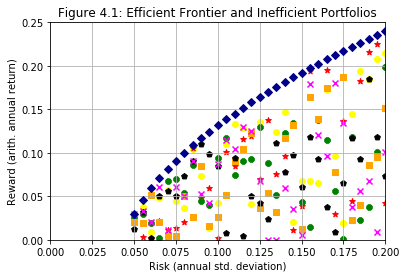

In [2]:
#Graph an efficient frontier with inefficient
#points below it
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# evenly sampled standard deviation
t = np.arange(0.05, .2, 0.005)

#Plot the frontier
plt.plot(t, .7*(t-.04)**.5-.04, 'bD', color='darkblue')
markers=['o','*','8','s','p','x']
colors=['yellow','red','green','orange','black','magenta']
#Six sets of random inefficient portfolios
for i in range(6):
    s=np.random.uniform(0,1,len(t))
    plt.scatter(t, s*(.7*(t-.04)**.5-.04), marker=markers[i], color=colors[i])
plt.axis([0,.2,0,.25])
plt.title('Figure 4.1: Efficient Frontier and Inefficient Portfolios')
plt.xlabel('Risk (annual std. deviation)')
plt.ylabel('Reward (arith. annual return)')
plt.grid(True)
plt.show();

### 4.1.1 Equality-Constrained Frontier
<a><a name="equality_constrained_frontier"></a>

Markowitz did not initially think about multiperiod portfolio construction, as that was too hard to deal with in 1952. Thus the issue of compounding and the relationship between arithmetic means and geometric (compound) means was avoided. He did not require multivariate normal distributions.

Finding an efficient portfolio n-vector $\boldsymbol{w}$ with a specified mean return $\mu$ is a quadratic optimization problem:
$$\text{Minimize  }\boldsymbol{w^{\prime}}C\boldsymbol{w}\label{eq:equal_frontier}\tag{4.11}$$
$$\text{Subject to } \boldsymbol{w^{\prime}m=\mu} \text{ and } \boldsymbol{w^{\prime}u}=1$$

Of course there are many other constraints we might impose, the most obvious being non-negative holdings. In 1952, there was [only one hedge fund](http://awjones.com/legacy/) that systematically had negative holdings (short sales). Today there are far more such portfolios, but there are also many portfolios that restrict themselves to non-negative holdings.

Long-only requirements are _inequality constraints_, which don't have a closed-form solution. If we just solve the equality-constrained problem in \eqref{eq:equal_frontier}, we can use Lagrange multipliers. We take derivates with respect to $\boldsymbol{w}$ of the Lagrangian
$$\boldsymbol{w^{\prime}}C\boldsymbol{w}-\lambda_1(\boldsymbol{w^{\prime}m}-\mu)-\lambda_2(\boldsymbol{w^{\prime}u}-1)$$
which gives
$$2C\boldsymbol{w}-\lambda_1m-\lambda_2u=0$$
If $C$ is nonsingular, we have
$$\boldsymbol{w}=C^{-1}(\lambda_1 m + \lambda_2 u)\label{eq:equal_frontier_lagrange}\tag{4.12}$$
where we rescale the $\lambda's$ so we can drop a factor of 2.

Left-multiplying \eqref{eq:equal_frontier_lagrange} by $\boldsymbol{m^{\prime}}$ and $u^{\prime}$, respectively, gives
$$\mu=m^{\prime}C^{-1}(\lambda_1 m+\lambda_2 u)$$
$$1=u^{\prime}C^{-1}(\lambda_1 m+\lambda_2 u)$$

Solving for the Lagrange multipliers $\lambda_1$ and $\lambda_2$ gives
$$\lambda_1=\frac{(u^{\prime}C^{-1}u)\mu-u^{\prime}C^{-1}m}{(u^{\prime}C^{-1}u)(m^{\prime}C^{-1}m)-(u^{\prime}C^{-1}m)^2}\label{eq:equal_frontier_lambda_one}\tag{4.13}$$
We can solve for $\lambda_2$ as a function of $\lambda_1$:
$$\lambda_2=\frac{1-(u^{\prime}C^{-1}m)\lambda_1}{u^{\prime}C^{-1}u}\label{eq:equal_frontier_lambda_two}\tag{4.14}$$
\eqref{eq:equal_frontier_lambda_one} expresses $\lambda_1$ as a function of the desired mean return $\mu$, or $\mu$ as a function of $\lambda_1$. It will be more convenient to look at it the second way, and retain $\lambda_1$ as a varying parameter that moves along the efficient frontier. Together with \eqref{eq:equal_frontier_lagrange}, \eqref{eq:equal_frontier_lambda_one} and \eqref{eq:equal_frontier_lambda_two} give the expression for efficient portfolios $\boldsymbol{w}$ as a function of the varying parameter $\lambda_1$:
$$w=\lambda_1\bigl(I-\frac{C^{-1}J}{u^{\prime}C^{-1}u}\bigr)C^{-1}m+\frac{C^{-1}u}{u^{\prime}C^{-1}u}\label{eq:equal_frontier_two_fund}\tag{4.15}$$
where $J=\boldsymbol{uu^{\prime}}$ is the nxn matrix of all ones. The variance at the solution is
$$w^{\prime}Cw=\lambda_1^2\bigl(\frac{(u^{\prime}C^{-1}u)(m^{\prime}C^{-1}m)-(u^{\prime}C^{-1}m)^2}{u^{\prime}C^{-1}u}\bigr)+\frac{1}{u^{\prime}C^{-1}u}\label{eq:equal_frontier_variance}\tag{4.16}$$

Note that the $\lambda_1^2$ term is positive[$^1$](#four_footnotes). If we don't care about mean return and just want the lowest variance portfolio possible, we set $\lambda_1=0$ and get
$$w_{minv}=\frac{C^{-1}u}{u^{\prime}C^{-1}u}\text{   and   }w_{minv}^{\prime}Cw_{minv}=\frac{1}{u^{\prime}C^{-1}u}\label{eq:equal_frontier_minv}\tag{4.17}$$

\eqref{eq:equal_frontier_two_fund} is sometimes called the **`Two-Fund Separation Theorem`** because of its linear form; efficient portfolios satisfying \eqref{eq:equal_frontier_two_fund} lie along a line in n-space. Let $w_1$ be the value of \eqref{eq:equal_frontier_two_fund} when $\lambda_1=1$; then any $w$ on the \eqref{eq:equal_frontier_two_fund} efficient frontier can be expressed as $w=\lambda w_1+(1-\lambda)w_{minv}$ for some $\lambda>0$. Thus in the simplified world of \eqref{eq:equal_frontier_two_fund}, investors don't have to choose between $n$ investments; every investor merely needs to buy some $w_{minv}$ and some $w_1$, with only the proportion changing from investor to investor.

<a><a name="frontier_leverage"></a>
If we don't care about variance and just want the highest mean portfolio possible, there is no bound. That is because so far we have not prevented leverage, which is measured by the sum of the positive entries in $\boldsymbol{w}$.
Thus if there are two assets with slightly different expected values, we could weight the higher one with a huge weight approaching infinity, and the lower one with one minus that weight. This two-asset portfolio has an expected return approaching infinity as the weight of the higher returning asset approaches infinity and the weight of the lower returning asset approaches minus infinity.

The hedge fund Long Term Capital Management reportedly used [leverage of around 25](http://clsbluesky.law.columbia.edu/2018/09/10/a-retrospective-on-the-demise-of-long-term-capital-management/), attempting to get near-infinite returns or at least near-infinite paychecks for its principals. Since $\boldsymbol{w^{\prime}u}=1$, leverage of 25 means that for every dollar invested in LTCM, the firm borrowed another \\$24 through short sales, and put \\$25 at risk. It would only take a drop of 4% in the value of its positive holdings (while the negative holdings didn't move) to bankrupt LTCM. LTCM no longer exists and its crash in 1998 nearly destroyed the entire financial system. As a practical matter limits &mdash; on holdings, on leverage &mdash; are imposed.

Reversing \eqref{eq:equal_frontier_lambda_one} to solve for $\mu$ in terms of $\lambda_1$, we obtain
$$\mu=m^{\prime}w=\lambda_1\bigl(\frac{(u^{\prime}C^{-1}u)(m^{\prime}C^{-1}m)-(u^{\prime}C^{-1}m)^2}{u^{\prime}C^{-1}u}\bigr)+\frac{u^{\prime}C^{-1}m}{u^{\prime}C^{-1}u}\label{eq:equal_frontier_mu}\tag{4.18}$$
Taking the square root of \eqref{eq:equal_frontier_variance} gives the associated standard deviation as a function of $\lambda_1$:
$$\sqrt{w^{\prime}Cw}=\sqrt{\lambda_1^2\bigl(\frac{(u^{\prime}C^{-1}u)(m^{\prime}C^{-1}m)-(u^{\prime}C^{-1}m)^2}{u^{\prime}C^{-1}u}\bigr)+\frac{1}{u^{\prime}C^{-1}u}}\label{eq:equal_frontier_sigma}\tag{4.19}$$
\eqref{eq:equal_frontier_mu} and \eqref{eq:equal_frontier_sigma} allow us to draw an efficient frontier on a graph like Figure 4.1, where the x coordinate is given by \eqref{eq:equal_frontier_sigma} and the y coordinate is given by \eqref{eq:equal_frontier_mu} as $\lambda_1$ varies from 0 to infinity.

### 4.1.2 Equality-Constrained Frontier: Example

We'll work an example using a portfolio of $n=3$ assets: Swiss francs (CHF), pounds sterling (&pound; or GBP), and Japanese Yen (&yen; or JPY). The portfolio is denominated in US dollars.

The code in the next cell retrieves the dollar per currency for these three currencies, and reports some general statistics:

In [3]:
import pandas as pd
import qrpm_funcs as qf
#Get 3 currencies until the end of
#previous year. Form sample covariance matrix
#and do simple efficient frontier calculations

lastday=qf.LastYearEnd()
#Swiss franc, pound sterling, Japanese Yen
seriesnames=['DEXSZUS','DEXUSUK','DEXJPUS']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,enddate=lastday)

#Convert levels to log-returns
#First take logs of the currency levels
#Currency exchange rates are usually expressed in the direction
#that will make the rate > 1
#Swissie and yen are in currency/dollar, but
#pounds is in dollar/currency. Reverse signs
#so everything is in dollar/currency

#Do each currency separately to account for separate missing data patterns
#dlgs is a list of lists of length 3 corresponding to the 3 currencies
#The value in dlgs is nan if there is missing data for the present or previous
#day's observation
#Otherwise it is the log of today/yesterday
multipliers=[-1,1,-1]
dlgs=[]
for i in range(len(multipliers)):
    lgrates=[]
    previous=-1
    for t in range(len(ratematrix)):
        if pd.isna(ratematrix[t][i]) or ratematrix[t][i]<=0:
            lgrates.append(np.nan)    #Append a nan
        else:
            if previous < 0:    #This is the first data point
                lgrates.append(np.nan)
            else:
                lgrates.append(np.log(ratematrix[t][i]/previous)*multipliers[i])
            previous=ratematrix[t][i]
    dlgs.append(lgrates)

#dlgs is the transpose of what we want - flip it
dlgs=np.transpose(dlgs)

#Delete any time periods that don't have data
lgdates=[]
difflgs=[]
for t in range(len(dlgs)):
    if all(pd.notna(dlgs[t])):
        #include this time period
        difflgs.append(dlgs[t])
        lgdates.append(cdates[t])

#Mean vector and covariance matrix are inputs to efficient frontier calculations
d=np.array(difflgs)
m=np.mean(d,axis=0)
c=np.cov(d.T)

#display the output
#vectors and matrices are in fractional units;
#    fraction*100=percent
#    fraction*10000=basis point
#    (fraction^2)*10000=percent^2
np.set_printoptions(precision=4)
print("Means:",m*10000,"bps/day")
print("(CHF, GBP, JPY)\n")
print("  ",c[0]*10000)
print("C=",c[1]*10000,"    (4.20)")
print("  ",c[2]*10000)
print(f'(%/day)\N{SUPERSCRIPT TWO} units')
print("  ")
print("From",lgdates[0],"to",lgdates[-1],"(",len(lgdates),"observations)")

Means: [ 1.2022 -0.4963  0.9699] bps/day
(CHF, GBP, JPY)

   [0.5113 0.2451 0.2175]
C= [0.2451 0.3551 0.1144]     (4.20)
   [0.2175 0.1144 0.4094]
(%/day)² units
  
From 1971-01-05 to 2019-12-31 ( 12285 observations)


The Swiss franc and the Japanese yen have appreciated versus the dollar since 1971, giving positive daily mean returns. The pound sterling has depreciated.

We're going to use the means shown above as the $\boldsymbol{m}$ vector in our calculations. This is a classic, and fatal, error:
><span style="color:red">**we are estimating future characteristics by naively using past characteristics.**</span>

We want to form a portfolio today that will carry us into the future. So we want to know the **`expected values`**, not the past sample values, of the mean vector and covariance matrix. Past sample values might be good estimators of expected values if the processes in question were **`stationary`**; that is, if they had unchanging parameters (see section x.x below). But the evidence is overwhelming that financial processes are not stationary over time.

Predicting the future from the past without understanding the generating process is doomed to failure. You can jump off a 50-story building and estimate, based on past experience for the first 49 stories, that you have a 100% ability to fly. Shortly after the $49^{th}$ story on the way down you will need to revise this estimate. You need to build gravity and the density of the terrain at the base of the building into your model of your location and health.

In fact, using past performance to predict the future is legally discouraged in the US and other jurisdictions. In the US, [the Code of Federal Regulations (17 CFR 230.156)](https://www.gpo.gov/fdsys/pkg/CFR-2003-title17-vol2/pdf/CFR-2003-title17-vol2-sec230-156.pdf) says

>Representations about past or future investment performance could be misleading because of statements ... including:
<br>- (A) Representations, as to security of capital, possible future gains or income, or expenses associated with an investment;
<br>- (B) Representations implying that future gain or income may be inferred from or predicted based on past investment performance; or
<br>- (C) Portrayals of past performance, made in a manner which would imply that gains or income realized in the past would be repeated in the future. 

Of course we need to learn from the past, but often (as with jumping off a building) it's better to bring in some kind of model (gravity is at work) to predict the future. What we really want are accurate estimates of future means and covariances. We're using past statistics in this example just because it's a convenient way to generate numbers of the right order of magnitude to illustrate the calculations. We'll say more about better estimation methods later in the chapter.

For now, we can compute the inverse of $C$ in (days/pct)$^2$ units:

In [4]:
#invert the c matrix, which is in (fraction/day)^2 units
#so ci (c-inverse) is in (days/fraction)^2 units
ci=np.linalg.inv(c)
print("          ",ci[0]/10000)
#Jupyter doesn't like this superscript
#print(f'C\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}=',ci[1]/10000,"    (4.21)")
print(f'C-inverse=',ci[1]/10000,"    (4.21)")
print("          ",ci[2]/10000)
print(f'(days/%)\N{SUPERSCRIPT TWO} units')

           [ 3.4417 -1.9638 -1.2796]
C-inverse= [-1.9638  4.2154 -0.1344]     (4.21)
           [-1.2796 -0.1344  3.1596]
(days/%)² units


From this we can compute the key quantities $u^{\prime}C^{-1}u$, $u^{\prime}C^{-1}m$, and $m^{\prime}C^{-1}m$:


In [5]:
#sum entries in ci
uciu=np.sum(ci)
#print(f'u\'C\N{SUPERSCRIPT MINUS}\N{SUPERSCRIPT ONE}u =',uciu/10000,
#      f'(days/%)\N{SUPERSCRIPT TWO}')
print(f'u\'(C-inverse)u =',uciu/10000,
      f'(days/%)\N{SUPERSCRIPT TWO}')

ucim=np.sum(np.matmul(ci,m))
print(f'u\'(C-inverse)m =',ucim,
      'days')
mcim=np.matmul(m,np.matmul(ci,m))
print(f'm\'(C-inverse)m =',mcim*10000,
      'bps')

u'(C-inverse)u = 4.061025866844458 (days/%)²
u'(C-inverse)m = 0.8804682829059165 days
m'(C-inverse)m = 8.473573705284734 bps


Filling in these data in equations \eqref{eq:equal_frontier_two_fund}, \eqref{eq:equal_frontier_mu}, and \eqref{eq:equal_frontier_sigma} gives the numbers for our 3-currency example portfolio. Here $\sigma=\sqrt{w^{\prime}Cw}$ is the standard deviation of the efficient portfolio $\boldsymbol{w}$:

In [6]:
#Vectors for equation 4.15
u=[1]*3
vec2=np.matmul(ci,u)/uciu
vec1=np.subtract(np.matmul(ci,m),vec2*ucim)
print(f"w'=lambda",vec1,"+",vec2,"    (4.15)#")

lambdacoeff=(uciu*mcim-ucim*ucim)/uciu
constmu=ucim/uciu
print(f'mu=(lambda *',lambdacoeff*10000,")+",constmu*10000," bps/day    (4.18)#")

print(f'sigma=sqrt(lambda\N{SUPERSCRIPT TWO} *',lambdacoeff*10000,'+', \
      10000/uciu,') (%/day)   (4.19)#')

w'=lambda [ 3.8282 -5.0425  1.2143] + [0.0488 0.5213 0.4298]     (4.15)#
mu=(lambda * 8.282679969903121 )+ 0.21680932645476286  bps/day    (4.18)#
sigma=sqrt(lambda² * 8.282679969903121 + 0.24624319883414844 ) (%/day)   (4.19)#


Note the vector coefficient of $\lambda_1$ in \eqref{eq:equal_frontier_two_fund}# has total weight zero (w/roundoff), and the constant vector in \eqref{eq:equal_frontier_two_fund}# has total weight one; it is the global minimum variance solution.

In that solution, pounds sterling (the middle coefficient) have the highest weight. From (4.20) we can see that pounds had the lowest variance, but that alone does not explain why they have the highest weight. There are also second-order effects from correlations with the other currencies. The minimum variance portfolio has a variance that is even lower than the pound's variance.

This shows that _diversification_ is a key aspect of portfolio construction &mdash; if everything were linear as it is with returns we would have only pounds in the minimum variance solution. We don't because of the quadratic balancing act. Figure 4.2 is the classic efficient frontier graph:

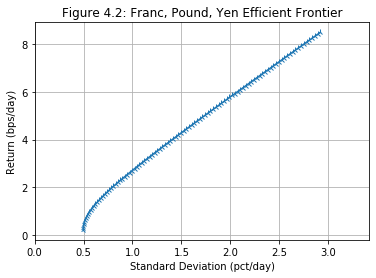

In [7]:
#Draw graph of simple efficient frontier
lambda1s=np.arange(0,1.01,.01)
xrisk=100*np.sqrt(lambdacoeff*lambda1s**2+1/uciu)   #Multiply * 100 for percent/day units
yreturn=10000*(lambdacoeff*lambda1s+constmu)        #Multiply * 10000 for bp units

plt.figure(1)
plt.plot(xrisk,yreturn,marker='2')
plt.title("Figure 4.2: Franc, Pound, Yen Efficient Frontier")
plt.xlabel("Standard Deviation (pct/day)")
plt.ylabel("Return (bps/day)")
plt.xlim(0,max(xrisk)+.5)
plt.grid()
plt.show();

The global minimum variance portfolio in this example has positive weights as we saw in \eqref{eq:equal_frontier_two_fund}#. From the negative middle entry in the vector multiplying $\lambda_1$ in \eqref{eq:equal_frontier_two_fund}#, we can see that the weight of the pound will go negative as $\lambda_1$ gets larger:

In [8]:
print(f'Pound weight goes negative at lambda=',-vec2[1]/vec1[1])
print('At that point mu=',-10000*lambdacoeff*vec2[1]/vec1[1]+10000*constmu,' bps/day')
print('and sigma=',10000*np.sqrt(lambdacoeff*(vec2[1]/vec1[1])**2+1/uciu),' bps/day')

Pound weight goes negative at lambda= 0.10338878928451077
At that point mu= 1.0731455805741146  bps/day
and sigma= 57.86006976905415  bps/day


### 4.1.3 Inequality Constraints

Then as $\lambda_1\rightarrow\infty$, we borrow more and more pounds to fund investments in francs and yen, heading off to an infinite expected return. Figure 4.2 stops at $\lambda_1=1$, but it could keep going.

But letting $\lambda_1$ get arbitrarily large isn't a sensible thing to do. If we start with a dollar, borrow a billion dollars worth of pounds and buy a billion and one dollars of francs&yen, then the slightest disturbance in the relationships between francs, yen and pounds will bankrupt us. We can't treat our estimated means and covariances as certainties and place infinite reliance on their accuracy.

Even if they were certain, we would have an absorbing barrier problem in the interim. That is, we can't have a net worth below zero; that's the definition of bankruptcy. We can draw a line on a graph that starts at \\$1, meanders down to -\\$0.10, and ends up at (positive) \\$3. But in reality, as soon as the line goes below zero, the entity represented by the line &mdash; a company, a fund, an investment &mdash; is bankrupt and will stop operating. That's similar to an absorbing barrier in physics, where a particle can meander only up to the point where it hits the sides of a container.

The mean-variance efficient frontier problem is often specified with the additional constraint that all weights must be non-negative. This changes the problem from one that can be solved in closed form to one that can be solved using a quadratic programming algorithm:
$$\text{Minimize } -\lambda m^{\prime}w + \frac{1}{2}w^{\prime}Cw$$
$$\text{Subject to } w^{\prime}u=1 \text{, each element of } w\geq0\label{eq:inequality_frontier}\tag{4.22}$$
In addition to the non-negative constraint, we have restated the problem slightly by building in a parameter $\lambda$ instead of a target mean $\mu$. This is the same idea as flipping \eqref{eq:equal_frontier_lambda_one} to \eqref{eq:equal_frontier_mu}. When $\lambda=0$, we solve for the global minimum variance portfolio. As $\lambda$ increases, we care more and more about return maximization and less and less about variance minimization. Thus $\lambda$ is a risk tolerance parameter &mdash; something like the [coefficient of absolute risk tolerance](#coeff_abs_risk_tolerance).

The solution to the long-only optimization \eqref{eq:inequality_frontier} is a piecewise series of solutions to the equality-constrained frontier \eqref{eq:equal_frontier_mu} and \eqref{eq:equal_frontier_sigma}. In the Franc/Pound/Yen frontier, for example, the equality-contrained minimum variance portfolio has all positive weights so it is also a solution to \eqref{eq:inequality_frontier}. The frontiers continue to coincide until the weight on the pound sterling goes to zero. Then the solution to \eqref{eq:inequality_frontier} is the efficient frontier consisting only of the Swiss franc and the Japanese yen, shown in orange in Figure 4.3 below. Eventually the Swiss franc (the highest-returning single asset) becomes the whole portfolio and the \eqref{eq:inequality_frontier} long-only frontier stops.

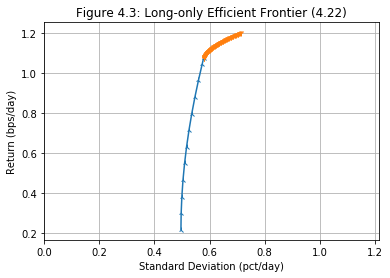

In [9]:
#Draw graph of long-only efficient frontier
#Segment with pounds
lambda_nopound=-vec2[1]/vec1[1]
lambda1s=np.arange(0,lambda_nopound,.01)
lambda1s=np.append(lambda1s,lambda_nopound)
x1=100*np.sqrt(lambdacoeff*lambda1s**2+1/uciu)   #Multiply by 100 for percent/day units
y1=10000*(lambdacoeff*lambda1s+constmu)        #Multiply by 10000 for bp units

#Get franc/yen portfolio at the point where pounds disappear
vec3=lambda_nopound*vec1+vec2
#rest of frontier decreases yen and increases francs
x2=[]
y2=[]
deltas=np.arange(0,vec3[2]*1.01,vec3[2]/100.)
for delta in deltas:
    newvec=vec3+[delta,0,-delta]
    y2.append(10000*np.matmul(newvec,m))
    x2.append(100*np.sqrt(np.matmul(np.matmul(newvec,c),newvec)))

plt.figure(1)
plt.plot(x1,y1,marker='2')
plt.plot(x2,y2,marker='1')
plt.title("Figure 4.3: Long-only Efficient Frontier (4.22)")
plt.xlabel("Standard Deviation (pct/day)")
plt.ylabel("Return (bps/day)")
plt.xlim(0,max(x2)+.5)
plt.grid()
plt.show();

### 4.1.4 Efficient Frontier and Utility Functions

The connection between portfolios that maximize utility functions and portfolios on the Markowitz efficient frontier is close but not perfect. For example, [L. B. Pulley, "Mean-Variance Approximations to Expected Logarithmic Utility"](https://www.jstor.org/stable/170783) concludes
>...investors maximizing expected logarithmic utility would hold virtually the same portfolios as investors maximizing certain mean-variance functions.

Similarly in a 1984 paper, [Kroll, Levy and Markowitz](https://doi.org/10.2307/2327667) concluded
>for various utility functions and the historical returns on 3 different sets of securities, when a portfolio may be chosen from any of the infinite number of portfolios of the standard constraint set, the best mean-variance efficient portfolio has almost maximum obtainable expected utility.

One way of making the connection between utility functions and the Markowitz efficient frontier objective function is to consider a quadratic one-period risk-averse utility function on returns, i.e. one that looks like $u(z)=-z^2+az$, $a>0$. The coefficient of absolute risk aversion is $2/(a-2z)$ so this is risk-averse when $z<a/2$. That is, $u(z)$ "likes" more return for a while, but if the shock is too big (negative or positive), it gets unhappy.

The investor wants to maximize the expected utility of returns:
$$\mathbb{E}[u(r^{\prime}w)]=\mathbb{E}[-(r^{\prime}w)^2+a\cdot r^{\prime}w]=-w^{\prime}\mathbb{E}[rr^{\prime}]w+aw^{\prime}\mathbb{E}[r]$$
where $r$ is the random vector of one-period returns. We have already defined the mean vector $m=\mathbb{E}[r]$ and the covariance matrix $C=\mathbb{E}[(r-m)(r-m)^{\prime}]$. Thus
$$C=\mathbb{E}[rr^{\prime}-2rm^{\prime}+mm^{\prime}]=E[rr^{\prime}]-mm^{\prime}$$

So we have
$$\mathbb{E}[u(r^{\prime}w)]=-w^{\prime}Cw-(w^{\prime}m)^2+aw^{\prime}m$$

This is similar to the Markowitz objective function \eqref{eq:inequality_frontier} (with $a=2\lambda$ and a change of sign) &mdash; although the covariance matrix is not de-meaned.

### 4.1.5 The Capital Market Line

The _capital market line_ is derived from the efficient frontier by the addition of a risk-free asset, i.e. a US Treasury or other instrument paying the risk-free rate that we discussed in Chapter 3. We assume the risk-free asset is nonstochastic, so it has no variance and no correlation with anything, including itself.

We can look for an efficient frontier in the usual way and just add the risk-free asset to our universe. However this will make our covariance matrix singular. The usual convention is to separate out the risk-free asset, which has a return $r_f$. For example, consider the franc, yen, pound efficient frontier. We zoom in to the beginning of the frontier and add a risk-free asset at (0,.1), i.e. $r_f=.1$bps/day.

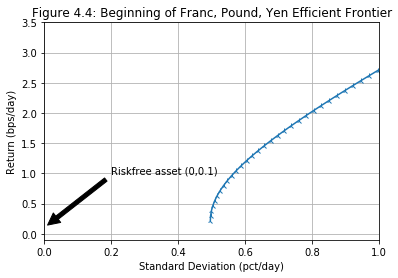

In [10]:
#Add a risk-free asset at .1 bps/day
rfrate=10**(-5)
plt.figure(2)
plt.plot(xrisk,yreturn,marker='2')
plt.title("Figure 4.4: Beginning of Franc, Pound, Yen Efficient Frontier")
plt.xlabel("Standard Deviation (pct/day)")
plt.ylabel("Return (bps/day)")
plt.xlim(0,1)
plt.ylim(-.1,3.5)
plt.annotate('Riskfree asset (0,'+str(10000*rfrate)+')', xy=(0, 10000*rfrate),
             xytext=(.2, 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.grid()
plt.show();

We can now be more efficient than the (old) efficient frontier. A straight line that runs between the risk-free asset at $(0,r_f)$ and some point $(x,y)$ that is on the efficient frontier where $y\geq r_f$ will lie above the efficient frontier until $(x,y)$. That line just represents linear combinations of the efficient portfolio at $(x,y)$ and a portfolio consisting only of the risk-free asset.

In fact if we choose the tangency point where the slope of the line from $(0,r_f)$ to the efficient frontier just touches the top of the frontier, the line will always be above the frontier. That optimal line is the new (including risk-free) efficient frontier and is called the **`capital market line`**. The two-fund separation theorem that we saw in formula \eqref{eq:equal_frontier_two_fund} now becomes even simpler: the new efficient portfolios are linear combinations of the risk-free asset and the tangency portfolio.

To compute the capital market line, note that equations \eqref{eq:equal_frontier_mu} and \eqref{eq:equal_frontier_sigma} specify the old efficient frontier; \eqref{eq:equal_frontier_mu} is the y coordinate and \eqref{eq:equal_frontier_sigma} is the x coordinate. Taking the slope with the chain rule, we see that $\frac{dy}{dx}=\frac{x}{\lambda_1}$. For tangency, this slope must equal $\frac{y-r_f}{x}$, which is the slope of the line between $(x,y)$ and the risk-free asset's representation.

Solving for $\lambda_1$ gives $\lambda_1=\frac{1}{u^{\prime}C^{-1}m - r_f(u^{\prime}C^{-1}u)}$. Putting this $\lambda_1$ into \eqref{eq:equal_frontier_lagrange} gives the tangency portfolio $w_{tp}$:
$$w_{tp}=\frac{C^{-1}(m-r_f u)}{u^{\prime}C^{-1}m - r_f(u^{\prime}C^{-1}u)}=\frac{C^{-1}m_e}{u^{\prime}C^{-1}m_e}\label{eq:tangent_portfolio}\tag{4.30}$$
where $m_e$ is the excess (over riskfree) return vector $m_e=m-r_f u$.

<a><a name="sharpe_ratio"></a>
A portfolio $w$'s [_Sharpe Ratio_](https://doi.org/10.3905%2Fjpm.1994.409501) is $\frac{w^{\prime}m_e}{\sqrt{w^{\prime}C_e w}}$, i.e. its excess expected mean return divided by its excess standard deviation[$^2$](#four_footnotes). Note that in the mean/standard deviation graphs we have been drawing, the slope of a line that goes through the point $(0,r_f)$ is the Sharpe ratio of portfolios on that line. Thus the maximum Sharpe ratio efficient portfolio is the tangency portfolio; to see this, visualize the set of lines from $(0,r_f)$ to points on the efficient frontier.

The tangency (best efficient Sharpe ratio) portfolio has an excess expected return equal to
$$w_{tp}^{\prime}m_e=\frac{m_e^{\prime}C^{-1}m_e}{u^{\prime}C^{-1}m_e}\label{eq:tangent_excess}\tag{4.31}$$
and a standard deviation
$$\sqrt{w_{tp}^{\prime}Cw_{tp}}=\frac{\sqrt{m_e^{\prime}C^{-1}m_e}}{u^{\prime}C^{-1}m_e}\label{eq:tangent_stddev}\tag{4.32}$$
Thus the Sharpe ratio of the tangency portfolio is
$$Sharpe(w_{tp})=\sqrt{m_e^{\prime}C^{-1}m_e}\label{eq:tangent_sharpe}\tag{4.33}$$

If we go back to our currency example and add a risk-free asset with $r_f=.1$bp/day, the tangency portfolio looks like this:

In [11]:
#Print the tangency portfolio
rfvec=[rfrate]*3
tangencyport=np.matmul(ci,m-rfvec)/(ucim-rfrate*uciu)
print('Tangency portfolio:',tangencyport)
#Solve for the lambda1 at tangency
mutp=np.matmul(tangencyport,m.T)
sigmatp=np.sqrt(np.matmul(np.matmul(tangencyport,c),tangencyport.T))
tpl1=(mutp-constmu)/lambdacoeff
print('TP mu=',mutp*10000,' bps/day')
print('TP sigma=',sigmatp*100,' pct/day')
print(f"lambda at tangency:",tpl1)

Tangency portfolio: [  8.119  -10.1086   2.9896]
TP mu= 17.677346704849267  bps/day
TP sigma= 6.0872343499378045  pct/day
lambda at tangency: 2.1080782357692294


Drawing the line between the riskfree rate on the y axis and the tangency portfolio gives the orange capital market line in Figure 4.5:

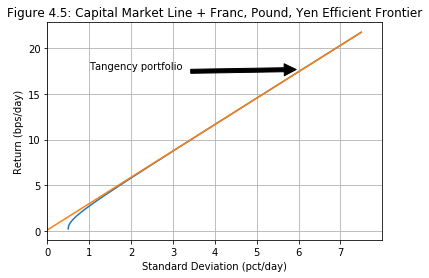

In [12]:
#Show capital market line
#Extend frontier
lambda1s=np.arange(0,tpl1+.5,.01)
xrisk=100*np.sqrt(lambdacoeff*lambda1s**2+1/uciu)
yreturn=10000*(lambdacoeff*lambda1s+constmu)

#Compute line
x=np.arange(0,max(xrisk),.01)
y=100*((mutp-rfrate)/sigmatp)*x+10000*rfrate

plt.figure(3)
plt.plot(xrisk,yreturn)
plt.plot(x,y)
plt.annotate('Tangency portfolio', xy=(sigmatp*100, mutp*10000),
             xytext=(1,mutp*10000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.title("Figure 4.5: Capital Market Line + Franc, Pound, Yen Efficient Frontier")
plt.xlabel("Standard Deviation (pct/day)")
plt.ylabel("Return (bps/day)")
plt.xlim(0,max(xrisk)+.5)
plt.grid()
plt.show;

The efficient frontier in Figure 4.5 is near-linear by the time the capital market line touches it, so there is little difference between the capital market line and the original efficient frontier in this example. When the efficient frontier has more nonlinear shape &mdash; for example as a result of multiple constraints &mdash; there can be more separation between the capital market line and the efficient frontier

### 4.1.6 Benchmark-Relative

As a practical matter, many investment vehicles are constrained to invest in certain segments of the capital markets. For example, a mutual fund may advertise that it is a "large-cap US equity fund." Investors who favor big US companies can give a sum of money to the mutual fund manager, and the manager will decide which big US companies to buy with that money. The manager would be amiss &mdash; and legally culpable &mdash; if it didn't mostly[$^3$](#four_footnotes) invest its investors' money in big US companies; to do otherwise would be false advertising. By the same token, investors can hardly blame the manager if big US stocks generally do poorly; they knew what they were getting into.

This situation is usually handled with a _benchmark portfolio_. Benchmark portfolios are often constructed by institutions that publish transparent benchmark composition rules intended to select certain market segments mechanically. For example, the FTSE/Russell company publishes the [Russell 1000&reg;](https://www.ftse.com/products/indices/russell-us) index of the one thousand largest stocks in Russell's universe; this is widely used as a large-cap US equity benchmark.

Most benchmark indices are **`capitalization-weighted`**; that is, the holding weights are proportional to the total market values (market price per share time shares outstanding) of the companies in the index. Sometimes caps are put on percentage holdings to attenuate the influence of one dominant player in a market. **`Float-weighting`** is sometimes used when portions of a company are unavailable to the public, for example due to founding family holdings: the "float" is the portion of the company that trades freely.

**`Equal-weighting`** (or the [1/N rule](#one_over_n)) weighs each of the $N$ securities in an index the same. One argument for this approach notes that if $P_M$ is the market price of a security and $P_T$ is its theoretically correct price if all future information about the company and the economy were known today, then: (a) if $P_M>P_T$, the company is overweighted in capitalization-weighted indices; while (b) if $P_M<P_T$, then the company is underweighted in capitalization-weighted indices. Thus capitalization-weighted indices overweight overpriced securities and underweight underpriced securities. On the other hand equal-weighting is random compared to a company's future prospects and so tends to get about half the weights right and half wrong; 50% right is better than 0% right. On the other hand, equal-weighted indices can be impractical if the smaller companies in the index are illiquid.

However a benchmark is constructed, risk is then redefined to be relative to the benchmark $b$. In our example $b=$[Russell 1000&reg;](https://www.ftse.com/products/indices/russell-us), which itself would be considered to have no risk, while cash would have quite a lot of risk. Rather than $\sqrt{w^{\prime}Cw}$, the relevant volatility would be $\sqrt{(w-b)^{\prime}C(w-b)}$; this benchmark-relative volatility is called _tracking error_. The objective function in an optimization like \eqref{eq:inequality_frontier} would change to $-\lambda m^{\prime}(w-b) + \frac{1}{2}(w-b)^{\prime}C(w-b)$.

<a><a name="information_ratio"></a>
The equivalent of a [Sharpe Ratio](#sharpe_ratio) in a benchmark-relative context is an _information ratio_; it is defined as $\frac{(w-b)^{\prime}m}{\sqrt{(w-b)^{\prime}C(w-b)}}$. The information ratio equals the Sharpe Ratio when the benchmark is the riskfree asset[$^2$](#four_footnotes).

### 4.1.7 Efficient Frontiers: Theory and Practice

While Markowitz started the field of quantitative finance and his work was revolutionary, investors quickly found that it often didn't work as well as the qualitative methods they were using before 1952. One problem is that the quadratic optimization process doesn't know that the numbers (means, covariances) it is given can be wrong. While a human would be skeptical about large, too-good-to-be-true returns, the optimization process is likely to put a heavy weight on a security with a too-good-to-be-true return.

Even realistic returns can lead to unrealistic results. A human would think that the difference between two securities, both with very similar covariances to the rest of the universe, and one with a mean of 1.12345 and the other 1.12346, was random. It wouldn't make much difference if you were buying one or the other. But as we noted when discussing [frontier leverage](#frontier_leverage), if you're buying one and selling the other, then any small difference between securities can be exploited with enough leverage. An unconstrained optimizer would go massively long the higher return one and massively short the lower, thereby multiplying random estimation errors.

In fact most of our currency example efficient frontier was highly leveraged and would be unattainable with the long only constraint; most of the "results" could be suspect. Thus, as we've already noted, in many cases holdings are constrained to be long only; this stops solutions from having any leverage. 

Despite the problems with naively using past statistics to predict the future, past (sample) covariance matrices are often used to estimate expected covariances. In fact a great deal of effort has been spent on understanding how covariances change over time; we'll discuss these efforts in Chapters x and y below. But covariances are less variable than sample mean returns. So there are a number of estimation methods that start with sample covariance matrices and then try to modify them so they are better predictors.

Sample covariance matrices are, by construction, at least positive semidefinite and possibly positive definite. We need $n$ time periods of observation to make an $n\times n$ covariance matrix nonsingular, but even if we have that many periods we still might not have a rich set of data for each entry. There are $n+1\choose 2$ different numbers in a covariance matrix. In every time period we observe $n$ rates of return. So if we have $t$ periods of observations, the number of observables per covariance is $\frac{2t}{n+1}$. For example, for the Russell 1000&reg; index, we would need 5005 time periods if we wanted to have a not very impressive ten observations per covariance.

5005 observations is about twenty years at a daily periodicity, which limits the number of companies that can be considered, as many do not have public trading data for that long. Too, daily observations are only valid for the most heavily traded stocks; a lightly traded stock may not have any meaningful trading activity after (say) 2PM, while more heavily traded stocks continue trading (and reacting to news) until 4PM. The day's return on the lightly traded stock is then asynchronous with the day's returns on more heavily traded stocks. That in turn can lead to misleadingly low correlations. Longer periodicities, like monthly, are often used to address this problem. A few hours of missing price movements out of a month is less noticeable than a few hours missing from a day. But at a monthly periodicity, any sample covariance matrix of the Russell 1000&reg; will be singular. That in turn causes problems with solving optimizations like \eqref{eq:equal_frontier}, which will no longer have a unique solution.

Even when covariance matrices aren't singular, they can have problems. The _condition number_ of a matrix is the ratio of its largest eigenvalue to its smallest eigenvalue. The larger the condition number, the more likely it is that a very small change in input variables (means and covariances) can make a very large change in output variables (weights of the optimal solution). 

Because of the generally poor quality of covariance matrices, most users of optimizers put bounds on many quantities in addition to long-only (or not-too-short) constraints. Individual holdings usually have concentration limits &mdash; e.g. no single stock can occupy more than 5% of the portfolio. If the optimization is benchmark-relative, then constraints like "every security must be within plus or minus 2% of the benchmark's weight in that security" can be set. Constraints are often placed on other relevant characteristics like industries, countries, property types (in real estate portfolios), and duration/credit quality (in fixed income portfolios).

Setting limits produces sensible portfolios, since the limits are set sensibly. But in effect it gives the answer to the optimizer &mdash; if the user is not careful, an optimizer can become a [smokescreen for the judgments of the human who put in very restrictive limits](https://www.jstor.org/stable/4479185)

## 4.2 Review of Bayes' Rule

We'll now turn our attention to some of the practical approaches to estimating the parameters $m$ and $C$ used in the construction of efficient portfolios. Many of them rely on Bayes' Rule, which we'll now briefly review.

Bayes' Rule is simple to state:
$$Pr(E\mid F)=\frac{Pr(F\mid E)Pr(E)}{Pr(F)}$$
It is essentially a restatement of the definition of [conditional probability](basic_probability_terminology) in \eqref{eq:condprob}. Despite this uncomplicated derivation, Bayes' Rule is profound. We'll walk through an example to get an intuitive feel for Bayes' Rule.

Suppose you are worried that you may have a rare disease that makes you forget your personal utility function. Fortunately there's a very accurate test for this condition. You go to the doctor and take the test, which comes back positive. You are now terrified that if you should run into some [Generous Billionaires](#generous_billionaires), you won't know what to do. You contemplate entering an intensive (and expensive) treatment program for the condition. Should you?

We need to be more precise: by "rare," we mean that only one in ten thousand people has the disease. And by "very accurate," we mean that the test is right 99% of the time.

The relevant outcome space $\Omega$ in this case is the set of roughly 7.5 billion people in the world. $\Omega$ can be divided into four disjoint events:
- People with positive test results who have the disease;
- People with positive test results who don't have the disease;
- People with negative test results who have the disease; and
- People with negative test results who don't have the disease.

From the $10^{-4}$ probability of having the disease, we know that 750,000 people in the world have the disease. This allows us to start filling in a table:

| Outcomes |  Have Disease |  Don't Have |  Total  |
|----------|:-------------:|------------:|:-------:|
| Test+    |               |             |         |
| Test-    |               |             |         |
| Total    |  750,000      | ~7.499Bn    |  7.5Bn  |

Of the 750,000 who have the disease, 99% are properly diagnosed and 1% (7,500) are misdiagnosed as not having the disease. Similarly for the 7.499Bn who don't have the disease. So we can completely fill in the table:

| Outcomes |  Have Disease |  Don't Have   |     Total     |
|----------|:-------------:|--------------:|:-------------:|
| Test+    |  742,500      |  74,992,500   |   75,735,000  |
| Test-    |    7,500      | 7,424,257,500 | 7,424,265,000 |
| Total    |  750,000      | 7,499,250,000 | 7,500,000,000 |

With a positive test result, you are in the Test+ row. But the vast majority of people with a positive test score are test mistakes in the "don't have" column. In fact even with a positive test result, your chance of having the disease is only 1%.

If $n=|\Omega|$ is the size of the outcome space, then we know
- Event E (have disease) has size $10^{-4}n=750,000$.
- Event W (wrong test result) has size $10^{-2}n=75,000,000$
- Event F (positive test result) has size $(10^{-2}+10^{-4}-2\cdot10^{-6})n=75,735,000$   
Event F's size is not directly given but is computed from the first row of the 2x2 matrix.

| Outcomes |  Have Disease | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Don't Have &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;                            | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     Total     |
|----------|:-------------:|------------------------------------:|:--------------------:|
| Test+    |  $E\cap F$    |  $(\Omega\setminus E)\cap F$                     |   $F$  |
| Test-    | $E\cap (\Omega\setminus F)$      |                 $(\Omega\setminus E)\cap (\Omega\setminus F)$     | $\Omega\setminus F$
| Total    |  $E$      | $\Omega\setminus E$                     | $\Omega$ |

In terms of probabilities, $p_E=10^{-4}$ is the probability of having the disease, and $p_W=10^{-2}$ is the probability of a wrong test result. Then the table looks like:

| Outcomes |  Have Disease | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Don't Have &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;                            | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;    Total     |
|----------|:-------------:|------------------------------------:|:--------------------:|
| Test+    |  $p_E(1-p_W)$    |  $(1-p_E)p_W$                     |   $p_F=p_E+p_W-2p_E p_W$  |
| Test-    | $p_Ep_W$      |                 $(1-p_E)(1-p_W)$     | $1-p_E-p_W+2p_E p_W$
| Total    |  $p_E$      | $1-p_E$                     | $1$ |

In our example, we wanted to know the probability of having the utility-forgetting disease (event E) given that we had observed a positive test result (event F). Event E is called the _prior_ &mdash; what you believed to be true before new information came in. So you believed that the chance of having utility-forgetting disease was very small (.01%) before taking the test.

Event F is the _update_: a positive test result. As we saw, from the fact that the test is wrong $p_W=.01$ of the time and the fact that $p_E=10^{-4}$, we could compute $p_F=p_E+p_W-2p_E p_W=.010098$. The conditional probability $Pr(F\mid E)$=probability positive test result given you have the disease is 99% because the test is 99% accurate independently of whether or not you have the disease. Putting it together, we get $Pr(E\mid F)$=probability of disease given positive test result$=.99*.0001/.010098=.009804$, or a little less than 1% as we saw.

Bayes Theorem is due to Thomas Bayes, who lived from 1701-1761. It is far ahead of its time in its clever use of existing information (e.g. utility-forgetting-disease is rare); new information (test results); and probability theory. This is especially clever because probability theory, at least as we know it today, didn't exist in the early 1700s. Of course the general concept of odds, such as in the Bernoullis' discussion of St. Petersburg paradox, existed then. But the formal framework including sample spaces, $\sigma$-algebras, and probability measures was a few hundred years in the future.

### 4.2.1 Shrinkage Estimators

Practitioners often use methods intended to improve parameter estimates, sometimes in conjunction with proprietary views on the future direction of markets. Many such methods take the form of _shrinkage estimators_. The general idea is similar to Bayes' Rule: we have some kind of prior belief about a quantity we are trying to estimate, and we "shrink" the deviations from the prior in some way. Often the prior is _centralized_, meaning it is based on some kind of marketwide average value.

An example of a centralized prior for an efficient portfolio is the vector $w=\frac{1}{n}u$; which indicates that everything in the universe is of equal importance without knowing anything about means and covariances. [Bouchard, Potters & Aguilar](https://arxiv.org/abs/cond-mat/9707042)[$^4$](#four-footnotes) had this prior in mind when they suggested maximizing a nonparametric portfolio diversification measure like entropy:
$$\exp\bigl(-\sum{w_i\cdot ln(w_i)}\bigr)$$
or an inverse [Herfindahl-Hirschman](https://www.jstor.org/stable/1818582) index
$$\frac{1}{\sum{w_i^2}}=\frac{1}{w^{\prime}w}$$
Here $w_i$ are the scalar components of the portfolio vector $w$, where as usual $w^{\prime}u=1$. For both metrics, the worst case is the intuitively most concentrated: one $w_i=1$ and the others equal to zero. Both measures equal one in that case. If $w\geq 0$, then for both measures the best case (where the measures equal $n$) is $w_i=1/n$ (in vectors, $w=\frac{1}{n}u$).

The Bouchard, Potters & Aguilar suggestion was to add one of the diversification measures to the portfolio optimization problem, so for example the objective in \eqref{eq:inequality_frontier} would be changed to
$$\text{Minimize } -\lambda m^{\prime}w + \frac{1}{2}w^{\prime}\bigl(C+\gamma I\bigr)w\label{eq:shrinkage_bouchard}\tag{4.40}$$
With a sufficiently large $\gamma$ parameter, the optimization will focus more on minimizing the nonparametric Herfindahl-Hirschman Index, and less on the quantities $m$ and $C$ that need estimating. This can produce a solution that mitigates the problem of too-heavy reliance on random noise in inputs, pushing solutions toward $w=\frac{1}{n}u$.

<a name="one_over_n"></a>The problem of parameter estimation is so large that some have suggested giving up on it altogether. [DeMiguel, Garlappi, and Uppal 2007](https://dx.doi.org/10.2139/ssrn.911512) considered the "1/N rule," which in our notation means giving infinite weight to the $\gamma$ parameter in \eqref{eq:shrinkage_bouchard}, forcing $w=\frac{1}{n}u$. DeMiguel et. al. evaluated out-of-sample performance of a number of variations on parameter estimation for Markowitz-type mean-variance optimization. They
>find that none is consistently better than the 1/N rule in terms of Sharpe ratio, certainty-equivalent return, or turnover. This finding indicates that, out of sample, the gain from optimal diversification is more than offset by estimation error... This suggests that there are still many "miles to go" before the gains promised by optimal portfolio choice can actually be realized out of sample. 

The DeMiguel et. al. "1/N rule" is a Bayesian approach with infinite weight on the centralized prior. Other methods also have centralized priors but are less than 100% dubious about update information. For example, the [_James-Stein shrinkage estimator_](http://digitalassets.lib.berkeley.edu/math/ucb/text/math_s4_v1_article-19.pdf) for the vector of multivariate normal means can be applied to the prior belief that all means are equal to some common scalar value $\mu_0$. The observed mean vector $m$ is then pushed some way back to this prior. A scalar $s$ is used to calibrate how far to push back:
$$s=\min\bigl(1,\frac{n-2}{T(m-\mu_0u)^{\prime}C^{-1}(m-\mu_0u)}\bigr)\label{eq:shrinkage_james_stein}\tag{4.41}$$
where $n$ is the number of variables in the vectors and $T$ is the number of observations (often time periods). The revised mean vector estimate is then
$$m_{new}=(1-s)m+s\mu_0u\label{eq:shrinkage_james_stein_mnew}\tag{4.42}$$
The default mean $\mu_0$ can for example be the average of all the means in m ($\mu_0=\frac{m\prime u}{n}$).

This seems like a sensible, quasi-Bayesian, heuristic for not relying too much on possibly erroneous sample data. But James and Stein showed something remarkable about this estimator: if there is a true (but unknown) population mean vector $m_{true}$, then
$$(m_{true}-m)^{\prime}C^{-1}(m_{true}-m)\geq(m_{true}-m_{new})^{\prime}C^{-1}(m_{true}-m_{new})\label{eq:shrinkage_james_stein_property}\tag{4.43}$$
That means that in some sense, the new estimator is guaranteed to be closer to the unknown true mean vector than the original. That's _for any value of $\mu_0$_! So you can just pick a $\mu_0$ randomly and you'll get closer to the true mean vector than your sample mean vector $m$. Of course an outrageous $\mu_0$ will cause the $s$ in \eqref{eq:shrinkage_james_stein} to be very small, so there won't be much adjustment. But it will be in the right direction!

A similar idea is seen in the [_Jorion shrinkage estimator_](https://dx.doi.org/10.2307/2331042), formed by taking
$$s=\frac{n+2}{n+2+T(m-\mu_{min}u)^{\prime}C^{-1}(m-\mu_{min}u)}\text{, where }\mu_{min}=m^{\prime}w_{minv}\tag{4.44}$$
and then applying the shrinkage combination in \eqref{eq:shrinkage_james_stein_mnew} with $\mu_0=\mu_{min}$. Here $w_{minv}$ is the minimum variance portfolio shown in \eqref{eq:equal_frontier_minv}.

In the next cell, we compute the James-Stein and Jorion estimates of the mean vector for our three-currency example. We hold out the last year of our sample data so we can later compare the estimates with the last year's out-of-sample mean vector.

In [13]:
#Compute James-Stein and Jorion estimates of mean based on previous year

#Search for end of previous year
for i in range(260,200,-1):
    if lgdates[-i][:4]==lastday[:4]:
        prev_year_n=len(lgdates)-i
        prev_year_date=lgdates[-i-1]
        break

#Form mean vector and covariance matrix up to end of previous year
prev_m=np.average(d[:prev_year_n],axis=0)
prev_c=np.cov(d[:prev_year_n].T)
prev_ci=np.linalg.inv(prev_c)
prev_dim=len(prev_m)
#Set the central prior
central_m=[np.average(prev_m)]*prev_dim
#Compute scale factor s
s_js=1/np.matmul(np.matmul(prev_m-central_m,prev_ci),prev_m-central_m)
s_js*=(prev_dim-2)/prev_year_n
if s_js>1:
    s_js=1

#James-Stein estimate of mean
james_stein_m=np.multiply(1-s_js,prev_m)+np.multiply(s_js,central_m)
print("James-Stein shrinkage factor:",s_js,"; common mean:",np.average(prev_m))
print("James-Stein estimate of mean as of "+prev_year_date,":",james_stein_m)

#Jorion estimate - get minimum variance portfolio's mean
prev_min_var_mean=np.matmul(prev_m,np.matmul(prev_ci,[1]*prev_dim))/np.sum(prev_ci)
central_m_jorion=[prev_min_var_mean]*prev_dim
s_jorion=np.matmul(np.matmul(prev_m-central_m_jorion,prev_ci),prev_m-central_m_jorion)
s_jorion=(prev_dim+2)/(prev_dim+2+prev_year_n*s_jorion)
if s_jorion>1:
    s_jorion=1
jorion_m=np.multiply(1-s_jorion,prev_m)+np.multiply(s_jorion,central_m_jorion)
print("\nJorion shrinkage factor:",s_jorion,"; minimum variance mean:",prev_min_var_mean)
print("Jorion estimate of mean as of "+prev_year_date,":",jorion_m)

James-Stein shrinkage factor: 0.08877928133110628 ; common mean: 5.523335594772368e-05
James-Stein estimate of mean as of 2018-12-31 : [ 1.1551e-04 -4.4204e-05  9.4393e-05]

Jorion shrinkage factor: 0.3198793061894678 ; minimum variance mean: 1.9034411699486342e-05
Jorion estimate of mean as of 2018-12-31 : [ 8.8645e-05 -3.0564e-05  7.2882e-05]


We can similarly apply shrinkage estimators to the covariance matrix. In a 1978 paper, [Elton & Gruber](https://dx.doi.org/10.2307/2326368) pointed out that there appeared to be little information in covariance matrices off the diagonal. They reluctantly concluded that just setting all off-diagonal correlations to the average value gave better estimates of future correlation matrices:
>In this section, we will assume that all pairwise correlation coefficients are equal. While this probably does not represent the true pattern one finds in the economy, it is very difficult to obtain a better estimate. Elsewhere we have shown that this assumption produces better estimates of future correlation coefficients than do historical correlation coefficients...

Thus &mdash; just as in the $1/N$ rule or the James-Stein and Jorion shrinkage estimators &mdash; Elton & Gruber came to the idea of a centralized prior. Olivier Ledoit and Michael Wolf used this idea in a [2003 paper](http://dx.doi.org/10.2139/ssrn.433840). Let $R=S^{-1}CS^{-1}$, where $C$ is a sample covariance matrix and $S=\sqrt{diag(C)}$ is the matrix with sample standard deviations on the diagonal and zeroes elsewhere. $R$ is the sample correlation matrix. Let $\rho_{average}=\frac{u^{\prime}Ru-n}{n(n-1)}$ be the average off-diagonal correlation. Then the constant correlation covariance matrix is
$$C_{\rho}=S(I+\rho_{average}(J-I))S\tag{4.45}$$
where as usual $J=uu^{\prime}$ is the matrix of all ones.

The Ledoit-Wolf constant-correlation covariance shrinkage estimator is
$$C_{cc}=sC_{\rho}+(1-s)C\tag{4.46}$$
where s is a scalar shrinkage parameter &mdash; the larger s is, the less trust you have in your correlations. Note that $C_{cc}$ has the same diagonal as the original $C$; variances are not changed in this shrinkage method.

Ledoit and Wolf give the following rather elaborate estimate of $s$:
- First, define $y_{it}$ as the de-meaned observation of the $i^{th}$ security's return in time period $t$, so that $\sum_t y_{it}=0$. Then if $Y$ is the sample de-meaned return matrix ($n\times T$), then $C=\frac{1}{T}YY^{\prime}$ is the sample covariance matrix.
- Second, define $f_{ij}$ as the $(i,j)$ element of $C_{\rho}$ and $s_{ij}$ as the (i,j) element of $C$.
- Third, compute $\hat{\pi}=\sum_i\sum_k\pi_{ij}$ where $\pi_{ij}=\frac{1}{T}\sum_{t=1}^T\bigl(y_{it}y_{jt}-s_{ij}\bigr)^2$
- Fourth, compute $\hat{\nu}_{ii,ij}=\frac{1}{T}\sum_{t=1}^T\bigl(y_{it}^2-s_{ii}\bigr)\bigl(y_{it}y_{jt}-s_{ij}\bigr)$. Then compute $\hat{x}=\sum_{i=1}^n\pi_{ii}+\frac{\rho_{average}}{2}\sum_{i=1}^n\sum_{j=1,j\neq i}^n\bigl(\sqrt{\frac{s_{jj}}{s_{ii}}}\hat{\nu}_{ii,ij}+\sqrt{\frac{s_{ii}}{s_{jj}}}\hat{\nu}_{jj,ij}\bigr)$
- Fifth, compute $\hat\gamma=\sum_{i=1}^n(f_{ij}-s_{ij})^2$
- Sixth, set $s=\frac{\hat{\pi}-\hat{x}}{\hat{\gamma}}$. Ledoit and Wolf suggest bounding this between 0 and 1 if necessary.

While this estimate of the optimal shrinkage intensity $s$ is quite complicated to write down, it is not hard to program. An easier heuristic is to set $s$ equal to the fraction of the trace contained in the correlation matrix's first $\sqrt{n}$ eigenvalues.

In a later paper [Ledoit and Wolf 2004](https://doi.org/10.1016/S0047-259X(03)00096-4) suggest a different prior: rather than keeping variances the same, they shrink them back to the average variance. They also shrink correlations to zero. This second Ledoit-Wolf shrinkage method has [been implemented in packages like Scikit-Learn](https://scikit-learn.org/stable/modules/covariance.html#shrunk-covariance).

The second Ledoit-Wolf shrinkage method starts with $X$, the $T\times n$ matrix of data such as returns or log-returns of $n$ variables observed over $T$ time periods. The sample covariance matrix is $C=\frac{1}{T-1}X'(I-J/T)X$, where $I$ is the $T\times T$ identity matrix and $J$ is the $T\times T$ matrix of all ones; the $I-J/T$ term de-means the observations. This is shrunk to
$$C^*=s^*(\bar{v}I)+(1-s^*)C\label{eq:ledoit_wolf_2}\tag{4.47}$$
where $\bar{v}$ is the average variance, i.e. the trace of the sample covariance matrix $C$ divided by $n$, the dimension of $C$.

The shrinkage intensity $s^*$ is formed as follows: Define $d=\|S-\bar{v}I\|$, where $\|x\|=\sqrt{\text{tr}{(xx^{\prime})/n}}=\sqrt{\frac{1}{n}\sum_{i=1}^n\sum_{j=1}^nx_{i,j}^2}$. Here $tr(z)$ means the trace of the matrix $z$, so $\|x\|$ is the scaled Frobenius norm of the $n\times n$ matrix $x$. Define
$$\bar{b}^2=\frac{1}{T^2}\sum_{i=1}^T\|x_i^{\prime}x_i-C\|^2\tag{4.48}$$
where $x_i$ is the $i^{th}$ row of the de-meaned observation matrix $(I-J/T)X$. Then the shrinkage intensity is $s^*=min(1,\frac{\bar{b}^2}{d^2})$.

A heuristic method combining the two Ledoit-Wolf shrinkage estimators with both variance and correlation priors centralized looks like this:
$$C_{cc}^*=s_{cc}^*\bar{v}(I+\rho_{average}(J-I))+(1-s_{cc}^*)C\label{eq:ledoit_wolf_heuristic}\tag{4.49}$$

In the next cell we apply the heuristic Ledoit-Wolf shrinkage method \eqref{eq:ledoit_wolf_heuristic} to our three-currency example covariance matrix. As above, we hold out the last year of our sample data so we can later compare the estimates with the last year's out-of-sample covariance matrix. For comparison, we show the Scikit-Learn version of the \eqref{eq:ledoit_wolf_2} estimator. Both methods have small shrinkage intensities due to the large number of observations, which increases confidence in the sample covariance matrix $C$.

In [14]:
# Ledoit-Wolf heuristic covariance estimator 4.49
# Scikit-Learn Ledoit-Wolf covariance estimator

# Form the three-currency correlation matrix as of previous year
prev_sig=np.sqrt(np.diag(np.diag(prev_c)))
prev_sig_inverse=np.linalg.inv(prev_sig)
prev_r_matrix=np.matmul(np.matmul(prev_sig_inverse,prev_c),prev_sig_inverse)

# Get average correlation (off-diagonal)
prev_avg_corr=(np.sum(prev_r_matrix)-prev_dim)/(prev_dim**2-prev_dim)
# Get average variance
prev_avg_variance=np.matrix.trace(prev_c)/prev_dim
# Centralized prior
prev_prior=prev_avg_variance*(np.ones((prev_dim,prev_dim))*prev_avg_corr+ \
                              np.identity(prev_dim)*(1-prev_avg_corr))

# Compute shrinkage intensity modified from 4.47
shrink_d=np.linalg.norm(prev_c-prev_prior)/np.sqrt(prev_dim)

# b-squared as in 4.48
shrink_b_sq=0
for i in range(prev_year_n):
    mtrx=d[i].reshape(-1,1)
    shrink_b_sq+=np.linalg.norm(mtrx.dot(mtrx.T)-prev_c)**2
shrink_b_sq/=prev_year_n**2
shrink_b_sq/=prev_dim

s_ledoit_wolf_heuristic = min(1,shrink_b_sq/shrink_d**2)

# Ledoit-Wolf estimate
ledoit_wolf_est = np.multiply(1-s_ledoit_wolf_heuristic,prev_c) + \
    np.multiply(s_ledoit_wolf_heuristic,prev_prior)

print("As of",prev_year_date+":")
print("Ledoit-Wolf heuristic shrinkage factor:",s_ledoit_wolf_heuristic)
print("Average correlation:",prev_avg_corr,"; average variance:",prev_avg_variance)
print("Ledoit-Wolf heuristic covariance estimate:\n",ledoit_wolf_est)

# Use Scikit-Learn version
from sklearn.covariance import LedoitWolf
cov = LedoitWolf().fit(d)
print("Scikit-Learn Ledoit-Wolf shrinkage factor:",cov.shrinkage_)
print("Scikit-Learn Ledoit-Wolf covariance estimate:\n",cov.covariance_)

As of 2018-12-31:
Ledoit-Wolf heuristic shrinkage factor: 0.027494862024987105
Average correlation: 0.4524197391788564 ; average variance: 4.305427195648576e-05
Ledoit-Wolf heuristic covariance estimate:
 [[5.1697e-05 2.4793e-05 2.1995e-05]
 [2.4793e-05 3.5879e-05 1.1872e-05]
 [2.1995e-05 1.1872e-05 4.1587e-05]]
Scikit-Learn Ledoit-Wolf shrinkage factor: 0.0034475263470184958
Scikit-Learn Ledoit-Wolf covariance estimate:
 [[5.1095e-05 2.4426e-05 2.1673e-05]
 [2.4426e-05 3.5528e-05 1.1398e-05]
 [2.1673e-05 1.1398e-05 4.0946e-05]]


### 4.2.2 Statistical Tests

The shrinkage estimators of the previous section seem plausible. Some of them have theoretical backing based on assumptions about underlying distributions &mdash; generally multivariate normal &mdash; or about asymptotic behavior. But since any theoretical assumptions about underlying distributions or asymptotic behavior are likely to be violated in practice, it's desirable to have a metric that tests the quality of an estimator.

The ultimate metric is the degree to which using the estimator in a portfolio selection process improves out-of-sample results. But there are common statistical tests for equality of means, variances, and covariance matrices that can be used to check directly whether or not a method is delivering better out-of-sample prediction.

Typically such tests are based on a function of observed data that produces a scalar metric whose distribution is known under assumptions about the distribution of the underlying data. It's also common that the test statistic will have a minimum (and best) value of zero. For example, suppose $f(x_1,x_2)$ is the statistic that we test to see whether or not the means of $x_1$ and $x_2$ could be the same, where $x_1$ and $x_2$ are sets of observed $n$-vectors. We will probably have $f(x_1,x_2)=0$ when $\bar{x_1}=\bar{x_2}$. $f(x_1,x_2)$ will then increase as $\bar{x_1}$ gets further and further away from $\bar{x_2}$.

Once a test metric like $f(x_1,x_2)$ is computed, a **`p-value`** can be found. The p-value is the cdf of the test metric under the test distribution. For example, we'll show a test statistic in \eqref{eq:hotelling_stat} below that does what we described in the previous paragraph; it tests for equality of means. This statistic follows an F distribution (see below) if the underlying data is multivariate normal. Thus the larger the cdf of the test statistic, the less likely it is that the two samples were generated by processes with the same mean vector. If the cdf is large enough (typically .95 or .99 for 5% or 1% significance), we might say that we reject the null hypothesis. (In our example the null hypothesis is the equality of means of the generating processes for the two samples.) Otherwise we **`fail to reject the null hypothesis.`**

Unfortunatly p-values depend on what are usually overly strong assumptions about the underlying generating distributions of the observed data. We agree with the [American Statistical Association's statement](https://www.tandfonline.com/doi/full/10.1080/00031305.2016.1154108) on p-values, which among other things states
>Scientific conclusions and business or policy decisions should not be based only on whether a p-value passes a specific threshold. 

But while the p-values might not be realistic, the test metrics might still help to distinguish relative distances. For example we might have two different methods of predicting out-of-sample behavior. We can look at the test metric that gives how distant each predictive vector is from out-of-sample data that was generated after the predictions were made. This can help assess predictive quality on a relative basis, but not necessarily on an absolute basis.

#### 4.2.2.1 Equality of mean vectors: Hotelling's Test

We've already seen that the James-Stein estimator satisfied the property \eqref{eq:shrinkage_james_stein_property}, which said that in some sense the James-Stein estimator $m_{new}$ was closer to the true (but unknown) population mean vector $m_{true}$ than the sample mean $m$. The distance metric was based on the inverse of the population covariance matrix $C$.

A more general form of this metric is [Hotelling's T statistic](https://doi.org/10.1214%2Faoms%2F1177732979), which in turn is a generalization of the Student's T statistic we will see in section 6.2. Hotelling supposes that we have two groups of data drawn independently from multivariate normal distributions, and we want to test the hypothesis that the mean vectors are the same.

So suppose that group $i$ ($i=1,2$) has observations $x_{i,1},\dots,x_{i,T_i}$ where each $x_{i,t}$ is a p-vector. Let $m_i=\frac{1}{T_i}\sum_{j=1}^{T_i}x_{i,j}$ and $S_i=\frac{1}{T_i-1}\sum_{j=1}^{T_i}(x_{i,j}-m_i)(x_{i,j}-m_i)^{\prime}$ be the sample mean vector and the sample covariance matrix, respectively, for the $i^{th}$ group. Form the combined covariance matrix $S_{comb}=\frac{(T_1-1)S_1+(T_2-1)S_2}{T_1+T_2-2}$. Then Hotelling's T statistic is
$$H(1,2)=\bigl(\frac{T_1+T_2-p-1}{(T_1+T_2-2)p}\bigr)\bigl(\frac{T_1T_2}{T_1+T_2}\bigr)(m_1-m_2)^{\prime}S_{comb}^{-1}(m_1-m_2)\label{eq:hotelling_stat}\tag{4.50}$$

$H(1,2)$ is distributed as an [F distribution](http://mathworld.wolfram.com/F-Distribution.html) with parameters $p$ and $T_1+T_2-1-p$. Thus if $F(H(1,2),p,T_1+T_2-1-p)>c$, we reject the null hypothesis that $x_1$ and $x_2$ were drawn from distributions with the same mean vectors with confidence $c$. However, this test is very sensitive to the assumption that the generating distributions were normal.

The code in the next cell applies Hotelling's test to the James-Stein and Jorion estimates of the three-currency mean vector, comparing them to the holdout year's mean vector. The null hypothesis of equal mean vectors is not rejected for either estimator, with Jorion scoring a little better than James-Stein.

In [15]:
import scipy.stats as spst
#Hotelling's test for james_stein and jorion

def hotelling(T1,T2,p,m1,m2,s1,s2):
    #Compute Hotelling's statistic and p value

    #Combined covariance matrix
    scomb=((T1-1)*s1+(T2-1)*s2)/(T1+T2-2)

    #Multiplier for statistic
    hmult=(T1+T2-p-1)*T1*T2/((T1+T2-2)*p*(T1+T2))

    #Matrix algebra for statistic
    if p==1:
        h12=hmult*(m1-m2)**2/scomb
    else:
        h12=hmult*np.matmul(np.matmul(m1-m2,np.linalg.inv(scomb)),m1-m2)
    
    p_value = 1.0 - spst.f.cdf(h12, p, T1+T2-1-p)
    #Note when the dimension p=1, p_value will equal spst.ttest_ind(x1,x2)

    return(h12,p_value)
    
# Compute mean vector of latest year

latest_m = np.average(d[prev_year_n:],axis=0)

# Compute covariance matrix of latest year
latest_c = np.cov(d[prev_year_n:].T)

# James-Stein
h12_js, p_js = hotelling(prev_year_n,len(d)-prev_year_n,prev_dim, \
                    james_stein_m, latest_m, prev_c, latest_c)

# Jorion
h12_jo, p_jo = hotelling(prev_year_n,len(d)-prev_year_n,prev_dim, \
                    jorion_m, latest_m, prev_c, latest_c)

print("Comparing mean vector estimates as of",prev_year_date)
print("    with mean vector for year ending",lastday+":")
print("Hotelling statistics for James-Stein, Jorion:",h12_js,h12_jo)
print("P-values for James-Stein, Jorion:",p_js,p_jo)

def signif_print(thresh,str_name,str_type,p_value):
#Print out text explaining significance
    one_minus_thresh=(1-thresh)*100

    if p_value < thresh:
        str_p=str_name+"Reject null hypothesis of equal "+str_type
        str_p+=" at %2.f" % one_minus_thresh
    else:
        str_p=str_name+"Cannot reject null hypothesis of equal "+str_type
        str_p+=" at %2.f" % one_minus_thresh
    str_p+="% significance"
    print(str_p)
#Done with signif_print
    
thresh=.01
signif_print(thresh,"James-Stein: ","means",p_js)
signif_print(thresh,"Jorion: ","means",p_jo)

Comparing mean vector estimates as of 2018-12-31
    with mean vector for year ending 2019-12-31:
Hotelling statistics for James-Stein, Jorion: 0.18271388380567716 0.13876612967175672
P-values for James-Stein, Jorion: 0.9081922513554642 0.9368533595687178
James-Stein: Cannot reject null hypothesis of equal means at 99% significance
Jorion: Cannot reject null hypothesis of equal means at 99% significance


#### 4.2.2.2 Equality of variances: Levene's Test

[Levene's Test](https://doi.org/10.1214/09-STS301) for equality of variances across two samples is less sensitive than an older test by Bartlett to the assumption of normality.

Extending the notation used in \eqref{eq:hotelling_stat}, let $x_{i,j,k}$ be the $k^{th}$ element of the $p$-vector $x_{i,j}$. For each $k$, Levene's Test tests the hypothesis that the $T_1$ observations $x_{1,j,k}$ were drawn from a distribution with the same variance as the $T_2$ observations $x_{2,j,k}$.

To do this, define $z_{i,j,k}=|x_{i,j,k}-m_{i,k}|$, where $m_{i,k}$ is the $k^{th}$ element of the $p$-vector $m_i$ defined above. Let $z_{i,k}=\frac{1}{T_i}\sum_{j=1}^{T_i}z_{i,j,k}$ be the mean of these absolute values for group $i$, element $k$, and let $z_{k}=\frac{1}{T_1+T_2}\sum_{i=1}^2\sum_{j=1}^{T_i}z_{i,j,k}$ be the overall average absolute difference. Then the Levene statistic for the $k^{th}$ element is
$$L_k=(T_1+T_2-2)\frac{T_1(z_{1,k}-z_{k})^2+T_2(z_{2,k}-z_{k})^2}{\sum_{i=1}^2\sum_{j=1}^{T_i}(z_{i,j,k}-z_{i,k})^2}\label{eq:levene}\tag{4.51}$$

$L_k$ is distributed as an F distribution with parameters $1$ and $T_1+T_2-2$. Thus if $F(L_k;1,T_1+T_2-1)>c$, we reject the null hypothesis that $x_{1,j,k}$ and $x_{2,j,k}$ were drawn from distributions with the same variances with confidence $c$. 

In the next cell, we apply Levene's Test to the three sample variances from the three-currency example for previous years compared to the latest year. We reject the null hypothesis of equal variances for two out of the three currencies.

In [16]:
# Apply Levene's Test to three-currency example with previous years
# compared to latest year
#Note the results shown are the same as
#scipy.stats.levene(d[:prev_year_n,k],d[prev_year_n:,k],center='mean')

def levene(x1,x2):

    #Numbers of observations
    T1=len(x1)
    T2=len(x2)
    #Could also use median
    m1=np.average(x1)
    m2=np.average(x2)
    #Form absolute difference observations
    z1j=[np.abs(x1[j]-m1) for j in range(T1)]
    z2j=[np.abs(x2[j]-m2) for j in range(T2)]
    #Average absolute difference in each set
    z1=np.average(z1j)
    z2=np.average(z2j)
    #Overall average difference
    z=(T1*z1+T2*z2)/(T1+T2)

    levene_mult=T1+T2-2
    levene_numer=T1*(z1-z)**2+T2*(z2-z)**2
    levene_denom=np.sum((z1j-z1)**2)+np.sum((z2j-z2)**2)

    levene_stat=levene_mult*levene_numer/levene_denom

    p_value = 1 - spst.f.cdf(levene_stat, 1, T1+T2-2)

    return(levene_stat,p_value)
#Done with levene

print("Comparing variances up to",prev_year_date,"with year ending "+lastday+":")
for i in range(prev_dim):

    lstat, p_value = levene(d[:prev_year_n,i],d[prev_year_n:,i])
    print("Levene statistic for "+seriesnames[i]+": ",lstat,", p-value: ",p_value)
    x,y = spst.levene(d[:prev_year_n,i],d[prev_year_n:,i],center='mean')
    print(x,y)
    signif_print(thresh,seriesnames[i]+": ","variances",p_value)


Comparing variances up to 2018-12-31 with year ending 2019-12-31:
Levene statistic for DEXSZUS:  55.95451872355379 , p-value:  7.915890165577366e-14
55.95451872355379 7.92103184519209e-14
DEXSZUS: Reject null hypothesis of equal variances at 99% significance
Levene statistic for DEXUSUK:  0.48605674670499305 , p-value:  0.48570478704010567
0.48605674670499305 0.48570478703981934
DEXUSUK: Cannot reject null hypothesis of equal variances at 99% significance
Levene statistic for DEXJPUS:  37.50380017552396 , p-value:  9.40208244593066e-10
37.50380017552396 9.402082364884086e-10
DEXJPUS: Reject null hypothesis of equal variances at 99% significance


#### 4.2.2.3 Equality of covariance matrices: Box's M Test

[Box's M Test](https://doi.org/10.1093/biomet/36.3-4.317) can be used to test the equality of covariance matrices. If $S_1$, $S_2$, and $S_{comb}$ are as defined in Section 4.2.2.1, then Box's M statistic is
$$M(1,2)=\bigl((T_1+T_2-2)\ln{(\det(S_{comb}))}-(T_1-1)\ln{(\det(S_1))}-(T_2-1)\ln{(\det(S_2))}\bigr)\label{eq:box_m_stat}\tag{4.52}$$
The statistic is modified by a multiplier that takes into account finite sample size. Box defines (equation (49)):
$$A_1=\frac{2p^2+3p-1}{6(p+1)}\bigl(\frac{1}{T_1-1}+\frac{1}{T_2-1}-\frac{1}{T_1+T_2-2}\bigr)\label{eq:box_m_a1}\tag{4.53}$$
and
$$A_2=\frac{(p-1)(p+2)}{6}\bigl(\frac{1}{(T_1-1)^2}+\frac{1}{(T_2-1)^2}-\frac{1}{(T_1+T_2-2)^2}\bigr)\label{eq:box_m_a2}\tag{4.54}$$

If $A_2-A_1^2\leq0$, $M(1,2)(1-A_1)$ is distributed as a $\chi^2$ distribution with $\text{df}_1$ degrees of freedom, where $\text{df}_1=\frac{p(p+1)}{2}$. So in this case, the p-value is $\chi^2(M(1,2)(1-A_1),\text{df}_1)$.

Otherwise, define $\text{df}_2=\frac{\text{df}_1+2}{A_2-A_1^2}$ and $b=\frac{\text{df}_1}{1-A_1-(\text{df}_1/\text{df}_2)}$; then $M(1,2)/b$ is distributed as an F distribution with $\text{df}_1$ and $\text{df}_2$ degrees of freedom. In this case the p-value is $F(M(1,2)/b,\text{df}_1,\text{df}_2)$.

The null hypothesis is that that $S_1$ and $S_2$ were formed from samples drawn from multivariate normal distributions with a common covariance matrix. We reject the null hypothesis with confidence $c$ when the p-value is greater than or equal to $c$.

This test is very sensitive to the assumption of multivariate normality. A useful heuristic when the covariances arise from sample data is to first use Levene's Test on the diagonals of the covariance matrices. This provides more precise information as to the particular variables causing hetereoskedasticity, and is less sensitive to non-normality. If the variances don't arise from sample data &mdash; for example, if they are the result of a shrinkage estimator &mdash; then Box's M Test can be applied first to the diagonals of the covariance matrices. Once the variances have been checked, Box's M Test can be applied to the correlation matrices.

The code in the next segment applies Box's M Test in two parts: first to variances only, and then to correlation matrices. The latest year is compared to previous years' sample data as well as to the Ledoit-Wolf heuristic estimates. The variances confirm Levene's Test: they emphatically reject the equality hypothesis. However both correlation matrices fail to reject equality, with Ledoit-Wolf doing slightly worse than the historical sample.

In [17]:
# Box M Test for covariance matrices
# From G.E.P. Box, "A General Distribution Theory for a Class of Likelihood Criteria",
# Biometrika 36, December 1949, pp. 317-346.

def BoxM(T1,T2,s1,s2):
    #Tests for equality of two covariance matrices, s1 and s2
    #T1 and T2 are numbers of observations for s1 and s2
    #Returns M statistic and p-value

    #Make sure dimension is common
    if len(s1)!=len(s2):
        print("Error: different dimensions in Box M Test:",len(s1),len(s2))
        return(0,0)
    
    #Matrices are pxp
    p=len(s1)

    #Form the combined matrix
    scomb=(T1*s1+T2*s2)/(T1+T2)

    #Box M statistic
    Mstat=(T1+T2-2)*np.log(np.linalg.det(scomb))-(T1-1)* \
        np.log(np.linalg.det(s1))-(T2-1)*np.log(np.linalg.det(s2))

    #Multipliers from equation (49) in Box 1949.
    A1=(2*p**2+3*p-1)/(6*(p+1))
    A1*=(1/(T1-1)+1/(T2-1)-1/(T1+T2-2))

    A2=(p-1)*(p+2)/6
    A2*=(1/(T1-1)**2+1/(T2-1)**2-1/(T1+T2-2)**2)

    discrim=A2-A1**2

    #Degrees of freedom
    df1=p*(p+1)/2

    if discrim <= 0:
        #Use chi-square (Box 1949 top p. 329)
        test_value=Mstat*(1-A1)
        p_value=1-spst.chi2.cdf(test_value,df1)
    else:
        #Use F Test (Box 1949 equation (68))
        df2=(df1+2)/discrim
        b=df1/(1-A1-(df1/df2))
        test_value=Mstat/b
        p_value=1-spst.f.cdf(test_value,df1,df2)
    
    return(test_value,p_value)
#Done with BoxM

print("Comparing variances up to",prev_year_date,"with year ending "+lastday+":")

#Apply to sample variances
stat, p_value = BoxM(prev_year_n,len(d)-prev_year_n,np.diag(np.diag(prev_c)), \
                     np.diag(np.diag(latest_c)))
print("Box M-stat and p-value for sample variances only:",stat,p_value)
signif_print(thresh,"","sample variances only",p_value)

#Compute latest correlation matrix
latest_sig=np.sqrt(np.diag(np.diag(latest_c)))
latest_sig_inverse=np.linalg.inv(latest_sig)
latest_r_matrix=np.matmul(np.matmul(latest_sig_inverse,latest_c),latest_sig_inverse)

#Apply to sample correlations
stat, p_value = BoxM(prev_year_n,len(d)-prev_year_n,prev_r_matrix,latest_r_matrix)
print("\nBox M-stat and p-value for sample correlation matrices:",stat,p_value)
signif_print(thresh,"","sample correlation matrices",p_value)

#Apply to Ledoit-Wolf heuristic correlations
lwh_sig=np.sqrt(np.diag(np.diag(ledoit_wolf_est)))
lwh_sig_inverse=np.linalg.inv(lwh_sig)
lwh_r_matrix=np.matmul(np.matmul(lwh_sig_inverse,ledoit_wolf_est),lwh_sig_inverse)
stat, p_value = BoxM(prev_year_n,len(d)-prev_year_n,lwh_r_matrix,latest_r_matrix)
print("\nBox M-stat and p-value for Ledoit-Wolf heuristic vs. "+ \
      "latest sample correlations:",stat,p_value)
signif_print(thresh,"","correlation matrices",p_value)


Comparing variances up to 2018-12-31 with year ending 2019-12-31:
Box M-stat and p-value for sample variances only: 51.507620609197666 1.1102230246251565e-16
Reject null hypothesis of equal sample variances only at 99% significance

Box M-stat and p-value for sample correlation matrices: 12.581663199945941 3.042011087472929e-14
Reject null hypothesis of equal sample correlation matrices at 99% significance

Box M-stat and p-value for Ledoit-Wolf heuristic vs. latest sample correlations: 12.392566918351813 5.218048215738236e-14
Reject null hypothesis of equal correlation matrices at 99% significance


### 4.2.3 Resampled Efficient Frontier

Shrinkage techniques deal with estimation error in means and covariances, but not directly with finding the portfolios on the efficient frontier. In 1992, [Philippe Jorion](https://www.jstor.org/stable/4479507) addressed the problem of finding efficient frontiers directly with the following procedure:
>1. Compute the means and covariance matrix from the actual sample of historical returns. Define T as the sample size (number of months, say) and N as the number of assets. Perform the optimization, given the stated objective function and investor constraints.
>2. Assume that the estimates from Step 1 are true values. From a multivariate normal distribution with these parameters, draw one random sample of N joint returns. This represents one month of simulated returns. Sample again until T months are generated.
>3. Estimate from these simulated returns a new set of means and a new variance-covariance matrix; perform an optimization using these inputs. The simulated optimal portfolio provides one observation in the distribution of the original optimal portfolio.
>4. Repeat Steps 2 and 3 until the distribution of the optimal portfolio is approximated with enough precision.

We can follow Jorion's procedure to see how much ambiguity there is in the minimum-variance portfolio $w_{minv}=\frac{C^{-1}u}{u^{\prime}C^{-1}u}$ from our three-currency example:

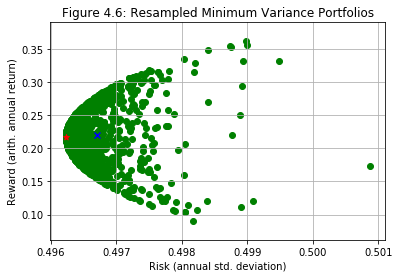

In [18]:
#Resample the minimum variance portfolio from 3-currency example
samp_size=1000
samp_time_periods=1000
samp_stds=[]
samp_means=[]
samp_portfolios=[]
for trial in range(samp_size):
    #Generate a virtual history of returns in x
    x=np.random.multivariate_normal(m,c,samp_time_periods)
    #Compute the virtual history's mean, covariance, and inverse covariance
    samp_m=np.mean(x,axis=0)
    samp_c=np.cov(x.T)
    samp_ci=np.linalg.inv(samp_c)
    #Compute minimum variance portfolio s_vec2 according to new parameters
    s_uciu=np.sum(samp_ci)
    s_vec2=np.matmul(samp_ci,u)/s_uciu
    #Find the mean and standard deviation of
    #this portfolio according to the old parameters
    samp_means.append(10000*np.matmul(s_vec2,m))
    samp_stds.append(100*np.sqrt(np.matmul(np.matmul(s_vec2,c),s_vec2)))
    samp_portfolios.append(s_vec2)

#Plot the minimum variance portfolios 
plt.scatter(samp_stds,samp_means,marker='o',color='green')
#Plot the original MV portfolio
plt.scatter(np.sqrt(10000./uciu),10000.*ucim/uciu,marker='*',color='red')
#Plot the average of the resampled MV portfolios
plt.scatter(np.mean(samp_stds),np.mean(samp_means),marker='x',color='blue')
#Zoom in on the x-range
xdiff=np.max(samp_stds)-np.min(samp_stds)
plt.xlim(np.min(samp_stds)-.05*xdiff,np.max(samp_stds)+.05*xdiff)
plt.title('Figure 4.6: Resampled Minimum Variance Portfolios')
plt.xlabel('Risk (annual std. deviation)')
plt.ylabel('Reward (arith. annual return)')
plt.grid(True)
plt.show();

There's a very large range of mean returns of the resampled minimum variance portfolio shown in Figure 4.6. The standard deviations (x-axis) are less variable, but even they show not only a range, but also an inevitable upward bias. The red marker is the original minimum variance portfolio, which is the only efficient portfolio on the graph according to the original parameters. The blue marker is the average of the sample characteristics, which is riskier than the original minimum variance portfolio. The difference between the blue marker and the red marker is an indication of how overly optimistic we were about our ability to get a low-variance portfolio.

There's also uncertainty about the weights. We can compute a 95% confidence interval for them from the sample:

In [19]:
#Show the 95% confidence intervals for the MV portfolio    
bottom=np.percentile(samp_portfolios,5,axis=0)
middle=np.percentile(samp_portfolios,50,axis=0)
top=np.percentile(samp_portfolios,95,axis=0)
print("95% confidence for MV portfolio:")
print("                     (CHF      GBP     JPY)")
print("Bottom of interval: ",bottom)
print("Middle of interval: ",middle)
print("Original MV port:   ",vec2)
print("Top of interval:    ",top)

95% confidence for MV portfolio:
                     (CHF      GBP     JPY)
Bottom of interval:  [0.0028 0.4759 0.3907]
Middle of interval:  [0.0499 0.5195 0.4312]
Original MV port:    [0.0488 0.5213 0.4298]
Top of interval:     [0.0943 0.563  0.4703]


Typically we see that zero is in (or close to) the confidence interval for the first (Swiss franc) weight, so we're not even sure we should have any in the minimum variance portfolio. The pound sterling (second) and Japanese yen (third) confidence intervals are typically about 8% wide. And the minimum variance portfolio is generally the most stable since it doesn't use the mean vector as an input!

A _resampled efficient frontier_ takes this resampling process and averages it to get a collection of optimal mean-variance portfolios that, it is hoped, will have less dependence on sampling noise. One way of averaging was proposed by Richard Michaud[$^5$](#four_footnotes) in 1998; Michaud has a [US patent](https://patents.google.com/patent/US6003018A/en) on this method, which is offered commercially through the firm [New Frontier Advisors](https://www.newfrontieradvisors.com/).

Michaud aggregates the minimum variance portfolios from each sample as we did above. He then chops the remainder of the efficient frontier from the minimum variance to the maximum return &mdash; assuming there is a maximum return &mdash; into an equal number of steps. For example suppose the original frontier had a minimum return of .2 and a maximum of 2 and there were 10 steps desired along the frontier; then 10 efficient portfolios $P_{1,0}$ with return .2; $P_{2,0}$ with return .4; ...; and $P_{10,0}$ with return 2 would be recorded. Then a resampled frontier would be generated for simulation 1; say its minimum and maximum returns were .15 and 2.88. The compositions of the 10 portfolios $P_{1,1}$ with return .15; $P_{2,1}$ with return .47; ...; and $P_{10,1}$ with return 2.88 would be recorded. This would be done for S simulations. Then the resampled frontier would consist of the 10 portfolios $\frac{1}{S+1}\sum_{s=0}^S P_{i,s}$ 

The Michaud method essentially aggregates resampled portfolios by target mean. Another method is offered by [Morningstar/Ibbotson](https://corporate.morningstar.com/Fib/documents/MethodologyDocuments/ResearchPapers/RobustAssetAllocation.pdf) which essentially aggregates by target standard deviation; their description is:
>Ibbotson uses a proprietary "bin approach," in which asset allocations from the _simulated_ portfolios are grouped together based on narrowly defined standard deviation ranges that cover the risk spectrum. The average asset allocations are then linked back to the original inputs to plot the resampled efficient frontier.

Whichever method is used, the general idea is to (a) lower and (b) estimate sampling noise through a process of resampling. [Bernd Scherer](https://doi.org/10.2469/faj.v58.n6.2489) points out that resampling methods will average out to the original efficient frontier when there are no constraints in the optimization process, but when there are constraints - for example, long-only holdings - the resampled frontier will generally improve on the original frontier. That is, empirical tests have generally shown that resampled frontiers do better at predicting out-of-sample (future) behavior than the original efficient frontier. But resampling is a heuristic rather than a proof, and practitioners continue to search for even better heuristics to predict out-of-sample behavior.


## 4.3 Black-Litterman

[Black-Litterman](https://doi.org/10.3905/jfi.1991.408013) is another attempt to deal with poor estimation of the Markowitz parameters, in this case through a Bayesian framework. Fischer Black's contributions to mathematical finance include (among many others) the Black-Scholes option pricing formula and two of the [short rate models](#other_short_rate_models) we discussed. Robert Litterman headed quantitative management at Goldman Sachs Asset Management and who we have already seen in the Litterman-Sheinkman paper about [key rates](#rolldown_key_rates). 

In the Black-Litterman framework, we assume there is a true but unobservable expected mean $n$-vector $\mu$ that is associated with the process generating asset returns. Before updating our information to estimate $\mu$, we have a prior belief: namely that it is consistent with the Capital Asset Pricing Model, which we will cover in section 5.1. The prior that comes from that model is:
$$\mu_{CAPM}=r_f u + (m^{\prime}w_M-r_f)\beta\label{eq:black_litterman_capm}\tag{4.70}$$
where $w_M$ is the market portfolio vector and $m$ is the mean vector we used [above](#markowitz_m_vector). $\beta=\frac{w_M^{\prime}C}{w_M^{\prime}C w_M}$, where $C$ is as in \eqref{eq:covariance_matrix}.

Our error of estimate is given by a multivariate normal distribution with mean 0 and covariance matrix $sC$, where $s$ is a confidence scalar. If s=0, we are perfectly confident that $\mu_{CAPM}$ is the right answer. As s gets larger, we get less confident. $C$ might be estimated from historical returns or from an equity model. Note however that a full covariance matrix $C$ is not consistent with the CAPM, which assumes $C=\sigma_M\beta^{\prime}\beta$.

In the Black-Litterman framework, we can express views (opinions) about the actual mean return n-vector $\mu$. A view is a value of some linear combination of returns. The simplest view is that a return on a particular asset will take on a particular value, but we can also (for example) express a view on an industry (a weighted combination of the assets in that industry), or on one group of assets versus another (a hedge or relative value trade). In general, we write
$$p=V\mu+\epsilon\label{eq:black_litterman_views}\tag{4.71}$$
where V is a $v\times n$ matrix whose rows are the linear combinations expressing the form of our views, of which we have v. p is a v-vector giving the outcomes of the views. $\epsilon$ is an error v-vector with mean 0.

For example, if we believe pharmaceutical stocks will outperform energy stocks by 12%, a row of $V$ would have positive weights (perhaps capitalization-weighted) on all the pharmaceutical stocks and negative weights on energy stocks, and the corresponding row of the v-column-vector $p$ would be 12%.

We are trying to minimize the error term $\epsilon$ on the right-hand side. To do this, we could solve a standard ordinary least squares (OLS) regression using least squares, obtaining $\mu=(V^{\prime}V)^{-1}V^{\prime}p$. However in accordance with our theme of keeping track of how much we don't trust our parameters, we assume that the error vector $\epsilon$ is multivariate normally distributed with mean 0 and $v\times v$ covariance matrix $\Gamma$. The smaller the entries of $\Gamma$, the more confident we are in our views. Usually we assume off-diagonal elements are 0, and that really is just to make things easier.

When we have an error matrix like $\Gamma$, we can use an extension of ordinary least squares regression called generalized least squares (GLS). The idea is to modify OLS regression by weighting the variables we are more sure about more heavily, and the variables we are less sure about less heavily. The GLS solution is
$$\mu_{views}=(V^{\prime}\Gamma^{-1}V)^{-1}V^{\prime}\Gamma^{-1}p\label{eq:black_litterman_views_mu}\tag{4.74}$$

We have two equations involving our estimate of $\mu$ &mdash; one from the CAPM \eqref{eq:black_litterman_capm} and one from views \eqref{eq:black_litterman_views_mu}. We can put them together and minimize the errors using GLS again. We put everything together into these vectors:
$$y=\left( {\begin{array}{c}
   \mu_{CAPM} \\
   p \\
  \end{array} } \right);
M=\left( {\begin{array}{c}
   I \\
   V \\
  \end{array} } \right);
E=\left( {\begin{array}{cc}
   sC & 0 \\
   0 & \Gamma \\
  \end{array} } \right)\label{eq:black_litterman_matrices}\tag{4.75}
$$
Plugging the quantities in \eqref{eq:black_litterman_matrices} into a GLS like \eqref{eq:black_litterman_views_mu} gives
$$\mu=\left(\frac{1}{s}C^{-1}+V^{\prime}\Gamma^{-1}V\right)^{-1}\left(\frac{1}{s}C^{-1}\mu_{CAPM}+V^{\prime}\Gamma^{-1}V\mu_{views}\right)\label{eq:black_litterman_overall_mu}\tag{4.76}$$
Recall that $s$ is the scalar that shows how much we disbelieve the prior &mdash; the CAPM view. As $s\rightarrow 0$, the views become less and less important and the estimate of $\mu$ approaches $\mu_{CAPM}$. On the other hand, as $s\rightarrow\infty$, the CAPM prior becomes less and less important and the views dominate, giving $\mu_{views}$ when the expressions make sense.

In this case &mdash; when the matrices are well-behaved enough &mdash; we can write
$$\mu=M_{CAPM}\mu_{CAPM}+(I-M_{CAPM})\mu_{views}\text{, where}$$
$$M_{CAPM}=\left(\frac{1}{s}C^{-1}+V^{\prime}\Gamma^{-1}V\right)^{-1}\frac{1}{s}C^{-1}\text{  and}\label{eq:black_litterman_overall_matrices}\tag{4.77}$$
$$M_{views}=\left(\frac{1}{s}C^{-1}+V^{\prime}\Gamma^{-1}V\right)^{-1}V^{\prime}\Gamma^{-1}V\text{   so}$$
$$M_{CAPM}+M_{views}=I$$
However note that $M_{CAPM}$ is affected by the views, and $M_{views}$ is affected by the CAPM. In fact views do not only affect the securities for which they are expressed &mdash; they are spread out over the entire vector. This reflects the fact that a view on a security passes through the covariance structure and affects other securities.

### 4.3.1 Black-Litterman Example

We'll work an example of Black-Litterman, using our currency data from earlier in the chapter. For currencies, the concept of "the market" is not as clear as it is for stocks. It's relatively easy to compute the total value of investable shares of Apple Computer or Walmart; it's less easy to compute the total value of investment we could make in Swiss francs. We'll just arbitrarily assign a market portfolio for our three currencies:
$$w_M=\left( {\begin{array}{c}
   .05 \\
   .15 \\
   .80 \\
  \end{array} } \right)\tag{4.78}$$

Then from our previous data we can compute the expected mean return $m^{\prime}w_M$ of the market, and the market's standard deviation $\sigma_M=\sqrt{w_M^{\prime}C w_M}$:

In [20]:
#Fake "market" for the three currencies
wmkt=np.array([.05,.15,.8])
mumkt=np.matmul(wmkt,m.T)
varmkt=np.matmul(np.matmul(wmkt,c),wmkt.T)
print('Mkt mu=',mumkt*10000,' bps/day')
print(f'Mkt sigma\N{SUPERSCRIPT TWO}=',varmkt*10000,f'(%/day)\N{SUPERSCRIPT TWO}')

Mkt mu= 0.7615379222010142  bps/day
Mkt sigma²= 0.3198375033910162 (%/day)²


We can also compute the vector of betas of the three individual assets with the market, and from that the $\mu_{CAPM}$ vector given by \eqref{eq:black_litterman_capm}. We don't make the small adjustment of the covariance matrix to an excess covariance matrix here.

In [21]:
betavec=np.matmul(c,wmkt)/varmkt
print('beta =',betavec)

mucapm=np.multiply(10000,rfvec+(mumkt-rfrate)*betavec)
print('mu-CAPM=',mucapm,' bps/day')

beta = [0.7389 0.4909 1.1118]
mu-CAPM= [0.5888 0.4248 0.8355]  bps/day


Let us now put in a single opinion, which is that pounds will outperform yen by .2bps/day. The CAPM prior says pounds will underperform yen, so we are going in a different direction. In the notation of \eqref{eq:black_litterman_views} (and assuming the unknown $\mu$ vector is in bps/day units) this says
$$p=.2$$
$$V=\left( {\begin{array}{ccc}
   0& 1& -1 \\
  \end{array} } \right)$$

Let us assume the error of estimate matrix of our views is (in 1/days$^2$ units) $\Gamma=.0001\cdot I$, where I is the identity matrix (actually a scalar here since v=1). We'll weight our market beliefs with $s=1$.

We can then compute the term
$$\left(\frac{1}{s}C^{-1}+V^{\prime}\Gamma^{-1}V\right)^{-1}$$
used in \eqref{eq:black_litterman_overall_mu} and \eqref{eq:black_litterman_overall_matrices}. We'll compute the term inside the parentheses in days$^2$ units. After inverting we'll multiply by 10000 for display purposes, which converts to (pct/days)$^2$ units. 

In [22]:
#View that pounds will outperform yen
view=np.array([0,1,-1])
pview=.00002

gamma=np.matrix([.0001])
sweight=1

#First Black-Litterman matrix calculation
print('C-inverse/s=',
      ci/sweight)
#Second matrix
v1=np.matmul(np.matrix(view).T,np.linalg.inv(gamma))
vgvmtrx=np.matmul(v1,np.matrix(view))
print('V\'(Gamma-inverse)V=',vgvmtrx)
#Sum of the two
print('Sum=',ci/sweight+vgvmtrx)

m1inv=np.linalg.inv(ci/sweight+vgvmtrx)
print('Sum inverse (pct/day)**2=',m1inv*10000)

C-inverse/s= [[ 34417.1305 -19638.0445 -12796.4193]
 [-19638.0445  42153.7641  -1344.0596]
 [-12796.4193  -1344.0596  31596.4108]]
V'(Gamma-inverse)V= [[     0.      0.      0.]
 [     0.  10000. -10000.]
 [     0. -10000.  10000.]]
Sum= [[ 34417.1305 -19638.0445 -12796.4193]
 [-19638.0445  52153.7641 -11344.0596]
 [-12796.4193 -11344.0596  41596.4108]]
Sum inverse (pct/day)**2= [[0.5108 0.2408 0.2228]
 [0.2408 0.3173 0.1606]
 [0.2228 0.1606 0.3528]]


The other terms are $\frac{1}{s}C^{-1}\mu_{CAPM}$ and $V^{\prime}\Gamma^{-1}V\mu_{views}$. Note from \eqref{eq:black_litterman_views_mu} we have $V^{\prime}\Gamma^{-1}V\mu_{views}=V^{\prime}\Gamma^{-1}p$:

In [23]:
cimcs=np.matmul(ci,mucapm/sweight)*10**(-4)
print('C-inverse*muCAPM/s=',cimcs)

print('V\'(Gamma-Inverse)p=',v1*pview)
m2=cimcs+v1.T*pview
print('Sum=',m2)
print("(All in units of days)")

C-inverse*muCAPM/s= [0.1232 0.522  1.8292]
V'(Gamma-Inverse)p= [[ 0. ]
 [ 0.2]
 [-0.2]]
Sum= [[0.1232 0.722  1.6292]]
(All in units of days)


Multiplying the matrix times the vector gives the Black-Litterman estimate $\mu$ as in \eqref{eq:black_litterman_overall_mu}:

In [24]:
mufinal=np.matmul(m1inv,m2.T)*10000
print('Black-Litterman mu (bps/day):',mufinal)

Black-Litterman mu (bps/day): [[0.5998]
 [0.5205]
 [0.7181]]


After a great deal of calculation, we have modified the $\mu_{CAPM}$ vector a little: the expected mean pound return has increased and the expected mean yen return has decreased, although not enough to fully implement our opinion that pounds would outperform yen by .2bps. The expected return on Swiss francs has changed a little too, even though we didn't have an opinion about it: this is because of the covariance structure causes our views to propagate through to the entire market.

Recall that we had some uncertainty parameters &mdash; the scalar $s$ and the matrix $\Gamma$ &mdash; that have no obvious calibration process. A Black-Litterman user can adjust them until they give an answer that seems intuitively appealing. The danger is similar to that of overconstraining an optimization &mdash; we adjust a quantitative process until it confirms our qualitative biases.  [Michaud, Esch, and Michaud](https://dx.doi.org/10.2139/ssrn.2641893) captured this concern in the title of their 2013 paper: "Deconstructing Black-Litterman: How to get the portfolio you already knew you wanted."

Still, such quantitative methods are not without value. It is more important to listen to what the algorithm is saying than to tell it what to do. For example, understanding what relationships caused the change in the Swiss franc's expected return in our Black-Litterman example might lead to some insight: what is it about the pound's and the yen's relationships with the franc that caused that movement? Is there some relationship between the Swiss, British, and Japanese economies that is being revealed, or is it just a statistical artifact? Pursuing these kinds of questions can lead to better results.

<a name="four_footnotes"></a>
# Chapter 4 Footnotes

$^1$ Covariance matrices are positive semidefinite by construction, and since we're assuming that $C$ is nonsingular, it's positive definite. So $C^{-1}$ is positive definite, forcing $u^{\prime}C^{-1}u$ to be positive. Further, there is a Cholesky factorization $C^{-1}=LL^{\prime}$, so the Cauchy-Schwarz inequality applies to the numerator of the $\lambda_1^2$ term, making it positive too.
<br>

$^2$ $C_e$ is the covariance matrix of excess returns over the riskfree rate. If the riskfree rate really is riskfree &mdash; i.e. it never varies &mdash; then $C_e=C$. But when we are using sample data over time, the riskfree rate does vary. Practitioners often ignore this and use $C$ in the denominator of the Sharpe Ratio. Since the riskfree rate is often far less variable than the assets forming the frontier, leaving it out of the denominator is usually not much of an omission. However during periods where the riskfree rate is highly variable, the omission can be significant. We used $C$ in the Capital Market Line calculations \eqref{eq:tangent_portfolio} to \eqref{eq:tangent_sharpe}, but technically $C_e$ should be used.
<br>

$^3$In the US, "mostly" means [80% or more](https://www.sec.gov/rules/final/ic-24828.htm)
<br>

$^4$Bouchard, Potters & Aguilar are physicists who now run a quantitative hedge fund in Paris (www.cfm.fr).
<br>

$^5$ The father-and-son team of Richard Michaud and Robert Michaud wrote _Efficient Asset Management: A practical Guide to Stock Portfolio Optimization and Asset Allocation_ in 1998; the second edition is from 2008 and is published by Oxford University Press, ISBN 978-0-19-533191-2.

In [25]:
#(environment already set)
#Use GBP's
currency_index = 1

#Find the first day of the 4-years-ago year
oldyear=int(lastday[:4])-5
oldyearend=qf.LastYearEnd(yearof=oldyear)
oldindex=lgdates.index(oldyearend)+1
print("index for date",oldyearend," is ",oldindex)

#Find the first day of the most recent full year
prevyear=int(lastday[:4])-1
prevyearend=qf.LastYearEnd(yearof=prevyear)
previndex=lgdates.index(prevyearend)+1
print("index for date",prevyearend," is ",previndex)

#Show indicative rates
print("Indicative rates:")
cd_index=cdates.index(prevyearend)
print(prevyearend,ratematrix[cd_index][currency_index])
print(cdates[cd_index-1],ratematrix[cd_index-1][currency_index])
cd_index_old=cdates.index(oldyearend)+2  #Offset might need adjustment
print(cdates[cd_index_old],ratematrix[cd_index_old][currency_index])
print(cdates[cd_index_old-2],ratematrix[cd_index_old-2][currency_index])

#Training set
TrainingSet=[x[currency_index] for x in difflgs[oldindex:previndex]]

#Starting guess
initparams=[.12,.85,.6]
a,b,c=qf.Garch11Fit(initparams,TrainingSet)

print("a",a)
print("b",b)
print("c",c)
print('a+b',a+b)
print('Annualized sqrt(c/(1-a-b))',np.sqrt(c/(1-a-b)*252))
print('Annualized training sample std. dev.',np.std(TrainingSet)*np.sqrt(252))
print('Training set excess kurtosis',spst.kurtosis(TrainingSet))

#Now that we have fit the GARCH parameters,
#use them during the latest year

livedata=[x[currency_index] for x in difflgs[previndex+1:]]
t=len(livedata)
minimal=10**(-20)
vg=np.var(TrainingSet)
overallmean=np.mean(livedata)  #Doesn't actually make much difference subtracting this off
standardized=np.zeros(t)

#Compute GARCH(1,1) var's from data given parameters
#use them to standardize live data
for i in range(t):
    #Note offset - i-1 observation of data
    #is used for i estimate of variance
    if i>0:
        vg=c+b*vg+a*(livedata[i-1]-overallmean)**2
        if vg<=0:
            vg=minimal
    standardized[i]=(livedata[i]-overallmean)/np.sqrt(vg)
    
stdstd=np.std(standardized)
stdkurt=spst.kurtosis(standardized)
print('Validation standardized standard deviation:',np.std(standardized))
print('Validation raw excess kurtosis:',spst.kurtosis(livedata))
print('Validation standardized excess kurtosis:',spst.kurtosis(standardized))


index for date 2014-12-31  is  11036
index for date 2018-12-31  is  12036
Indicative rates:
2018-12-31 1.2763
2018-12-28 1.2699
2015-01-02 1.5361
2014-12-31 1.5578
a 0.1072222902507575
b 0.8349947946509123
c 2.3971721625979995e-06
a+b 0.9422170849016698
Annualized sqrt(c/(1-a-b)) 0.10224690229456868
Annualized training sample std. dev. 0.10053316257477539
Training set excess kurtosis 28.089782280533747
Validation standardized standard deviation: 0.926677614900162
Validation raw excess kurtosis: 1.8459951903717302
Validation standardized excess kurtosis: 1.069272875169462


In [29]:
difflgs[-250]

array([0.0006, 0.005 , 0.0058])

In [30]:
1.2763/1.2699

1.0050397669107805

In [28]:
lgdates[-250]

'2018-12-31'